# Kaggle Home Credit Default Risk [Phase 1]

---


---
---

**Group 9**
- Jinlin Wang | *jinlinw3*
- Celeste Huang |  *yh69*
- Lechen Gong | *lecheng6*
- En Zhi | *enzhi2*
- Gege Yao | *gyao6*

---
---

# Data Preprocess & EDA
---

- The initial import from Kaggle was performed using the **Kaggle API**.
- Here, to ensure reproducibility, the first download step is omitted and the data is **imported directly from the local copy**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
app = pd.read_csv("application_train.csv")

## 1. SK_ID_CURR Analysis

The following blocks get the count of unique values of `SK_ID_CURR` and the total number of rows

In [3]:
app['SK_ID_CURR'].nunique(), app.shape[0]

(307511, 307511)

Since the number of unique value is equal to the number of rows, we can treat `SK_ID_CURR` as the table's PK

## 2. TARGET Column Analysis

There are 2 unique values 1 and 0:

In [4]:
app['TARGET'].nunique(), app['TARGET'].unique()

(2, array([1, 0], dtype=int64))

In [5]:
prop_1 = app[app['TARGET'] == 1]['TARGET'].count() / app['TARGET'].count()
prop_0 = app[app['TARGET'] == 0]['TARGET'].count() / app['TARGET'].count()
prop_1, prop_0, prop_1 + prop_0

(0.08072881945686496, 0.9192711805431351, 1.0)

`TARGET == 1` comprise about 8.1% of the dataset, while `TARGET == 0` 91.9%. This is an extremely **imbalanced data**.

## 3. Correlation Analysis

Generate a Pearson correlation matrix and heatmap (for any 10 numeric variables of choice) on application_tain.csv. Write code to list the top 5 features correlated with the TARGET column. (Hint: df.corr())

First we take all the numeric data columns and compute the pearson correlation

In [6]:
numeric_app = app.select_dtypes(include=['float64', 'int64'])
numeric_app= numeric_app.drop(columns=['SK_ID_CURR'], errors='ignore')
correlation_matrix = numeric_app.corr(method='pearson')
correlation_matrix

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,0.041975,...,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,0.183395,...,0.004031,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
AMT_INCOME_TOTAL,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,0.027805,...,0.003130,0.002408,0.000242,-0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,0.009621,...,0.034329,0.021082,0.031023,-0.016148,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448
AMT_ANNUITY,-0.012817,0.021374,0.191657,0.770138,1.000000,0.775109,0.118429,0.009445,-0.104332,0.038514,...,-0.009745,0.004573,0.011718,-0.017598,0.003861,0.002185,0.013881,0.039148,0.010124,-0.011320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.002704,-0.000366,0.002944,0.004238,0.002185,0.004677,0.001399,0.002255,0.000472,-0.000508,...,0.013281,0.001126,-0.000120,-0.001130,0.230374,1.000000,0.217412,-0.005258,-0.004416,-0.003355
AMT_REQ_CREDIT_BUREAU_WEEK,0.000788,-0.002436,0.002387,-0.001275,0.013881,-0.001007,-0.002149,-0.001336,0.003072,-0.001069,...,-0.004640,-0.001275,-0.001770,0.000081,0.004706,0.217412,1.000000,-0.014096,-0.015115,0.018917
AMT_REQ_CREDIT_BUREAU_MON,-0.012462,-0.010808,0.024700,0.054451,0.039148,0.056422,0.078607,0.001372,-0.034457,-0.011353,...,-0.001565,-0.002729,0.001285,-0.003612,-0.000018,-0.005258,-0.014096,1.000000,-0.007789,-0.004975
AMT_REQ_CREDIT_BUREAU_QRT,-0.002022,-0.007836,0.004859,0.015925,0.010124,0.016432,-0.001279,-0.011799,0.015345,-0.001308,...,-0.005125,-0.001575,-0.001010,-0.002004,-0.002716,-0.004416,-0.015115,-0.007789,1.000000,0.076208


We pick random 10 of them to see the heatmap:

In [7]:
np.random.seed(576)
features = correlation_matrix.columns.tolist()
sample_feats = np.random.choice(features, size=10, replace=False)
sub_corr = correlation_matrix.loc[sample_feats, sample_feats]
sub_corr

,FLOORSMIN_AVG,DAYS_REGISTRATION,FLAG_DOCUMENT_9,LIVINGAREA_AVG,LIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_AVG,BASEMENTAREA_MEDI,DAYS_LAST_PHONE_CHANGE,LANDAREA_AVG,LIVINGAREA_MEDI
FLOORSMIN_AVG,1.000000,0.021459,0.027130,0.466519,0.438320,0.075801,0.217516,-0.008009,0.148223,0.464216
DAYS_REGISTRATION,0.021459,1.000000,0.009898,0.007419,0.024734,0.034228,-0.021504,0.056983,0.003109,0.007926
FLAG_DOCUMENT_9,0.027130,0.009898,1.000000,0.021805,0.017089,0.003703,0.009823,0.003957,-0.006113,0.020840
LIVINGAREA_AVG,0.466519,0.007419,0.021805,1.000000,0.883245,0.135396,0.692613,-0.010645,0.501571,0.995596
LIVINGAPARTMENTS_MEDI,0.438320,0.024734,0.017089,0.883245,1.000000,0.156409,0.651530,-0.003297,0.423248,0.884690
NONLIVINGAPARTMENTS_AVG,0.075801,0.034228,0.003703,0.135396,0.156409,1.000000,0.094879,0.000676,0.065855,0.134342
BASEMENTAREA_MEDI,0.217516,-0.021504,0.009823,0.692613,0.651530,0.094879,1.000000,-0.007852,0.469117,0.691401
DAYS_LAST_PHONE_CHANGE,-0.008009,0.056983,0.003957,-0.010645,-0.003297,0.000676,-0.007852,1.000000,-0.000581,-0.010795
LANDAREA_AVG,0.148223,0.003109,-0.006113,0.501571,0.423248,0.065855,0.469117,-0.000581,1.000000,0.501050
LIVINGAREA_MEDI,0.464216,0.007926,0.020840,0.995596,0.884690,0.134342,0.691401,-0.010795,0.501050,1.000000


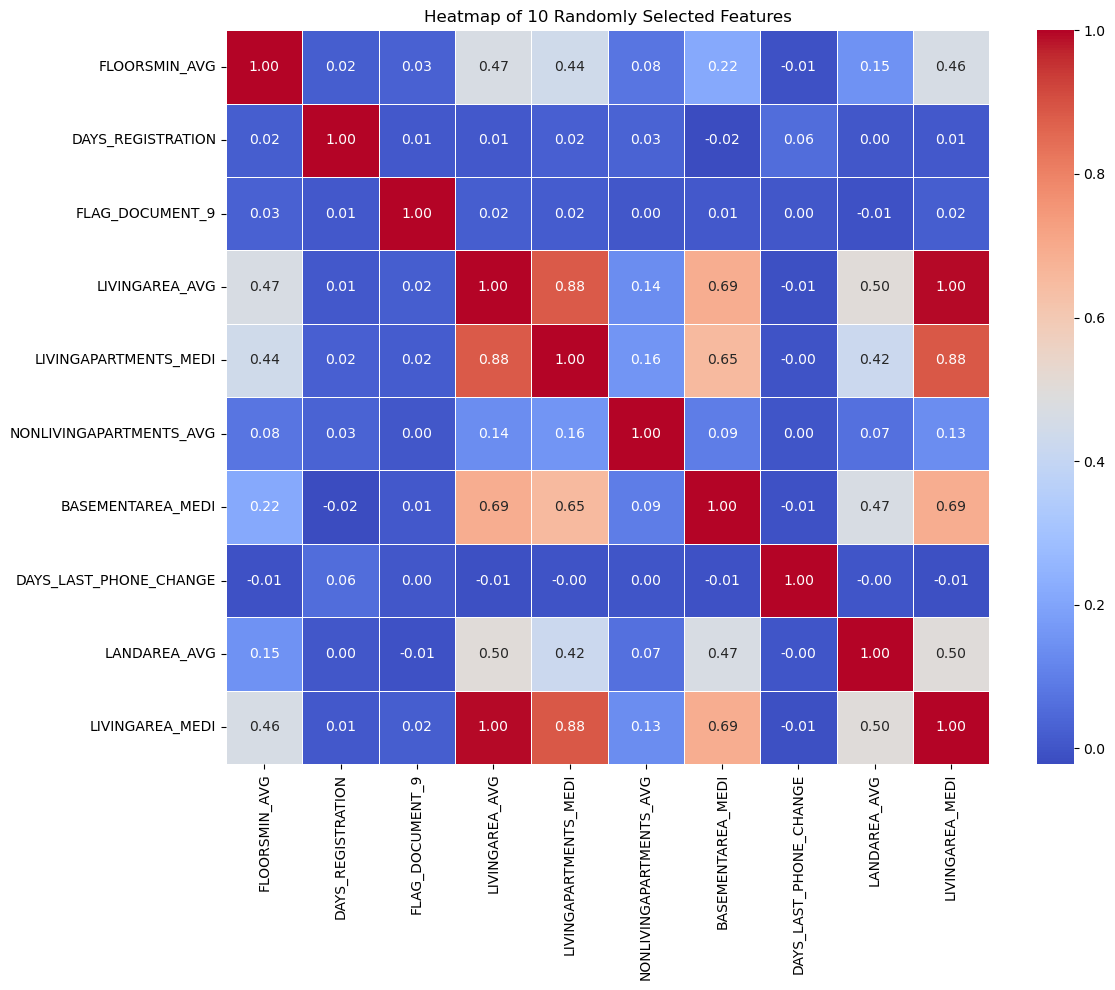

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(sub_corr,annot=True, cmap='coolwarm',fmt=".2f", linewidths=0.5)
plt.title('Heatmap of 10 Randomly Selected Features')
plt.tight_layout()
plt.show()

Here we find the **top 5 correlated** features with `TARGET`

In [9]:
abs_corr = correlation_matrix['TARGET'].abs()
top5 = abs_corr.drop('TARGET').sort_values(ascending=False).head(5)
top5

EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
Name: TARGET, dtype: float64

Noted that features are presented in absolute value, therefore the above table only shows how strong they're correlated, other than the directions.

## 4. Histogram

Here we randomly select 5 numerical features: `LANDAREA_AVG`, `AMT_REQ_CREDIT_BUREAU_YEAR` , `AMT_CREDIT` , `AMT_ANNUITY` , `CNT_CHILDREN`

In [10]:
features = ['LANDAREA_AVG','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_CREDIT','AMT_ANNUITY','CNT_CHILDREN']

And plot the **histogram**:

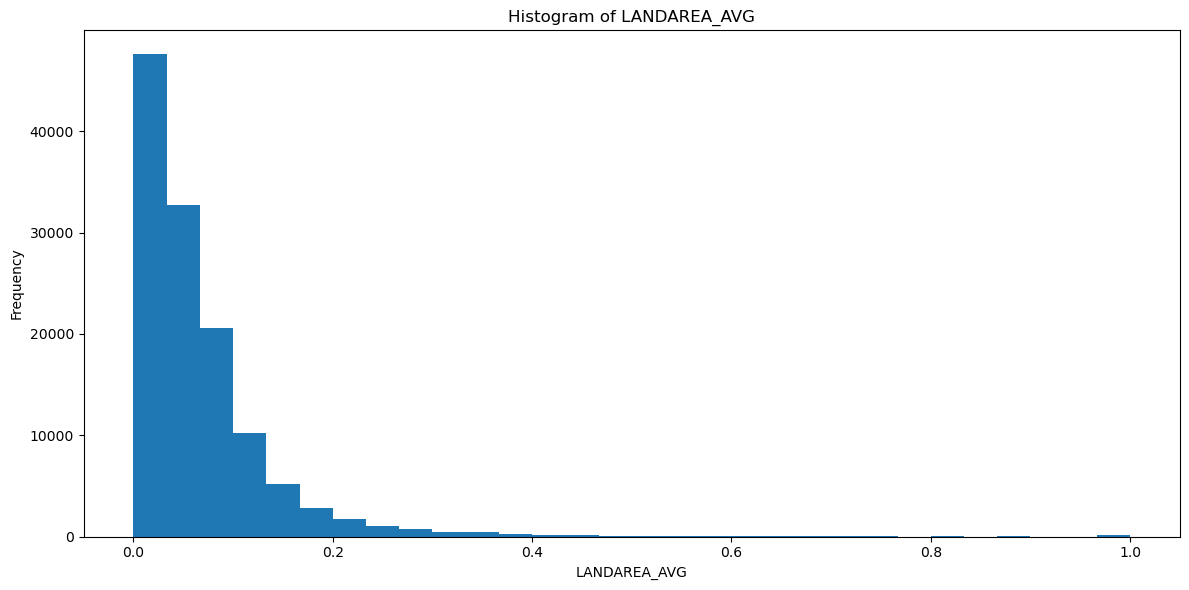

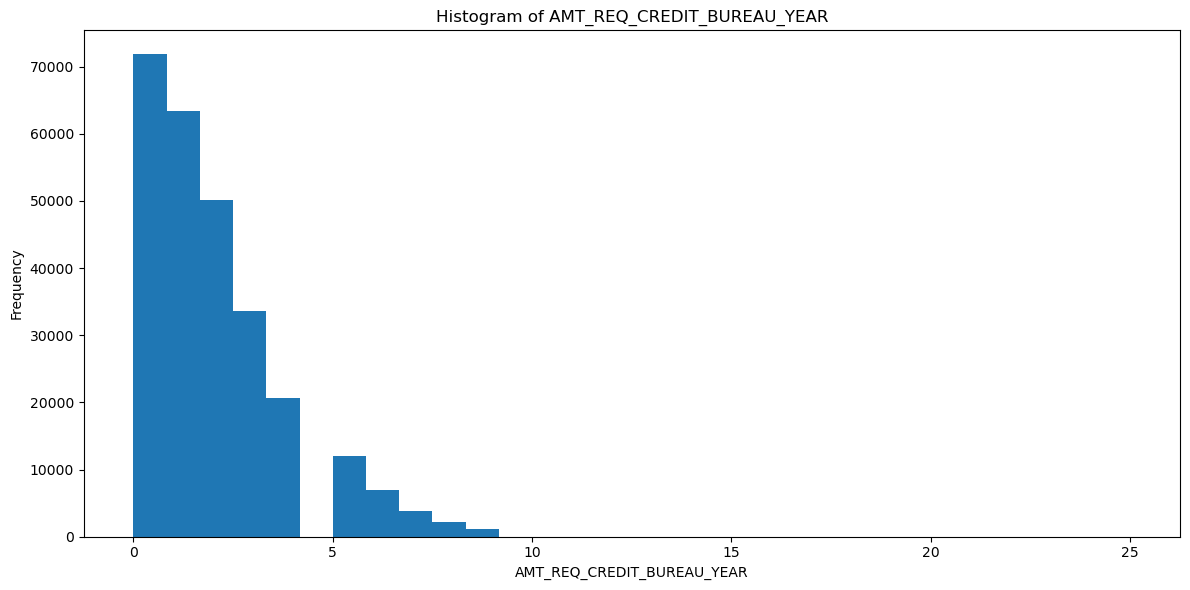

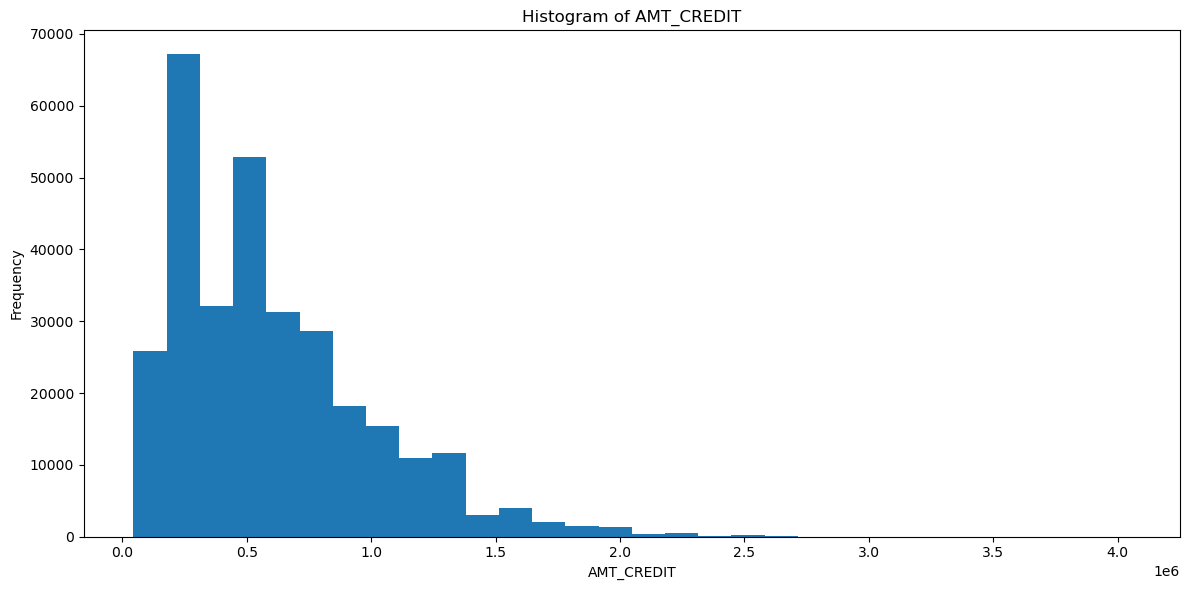

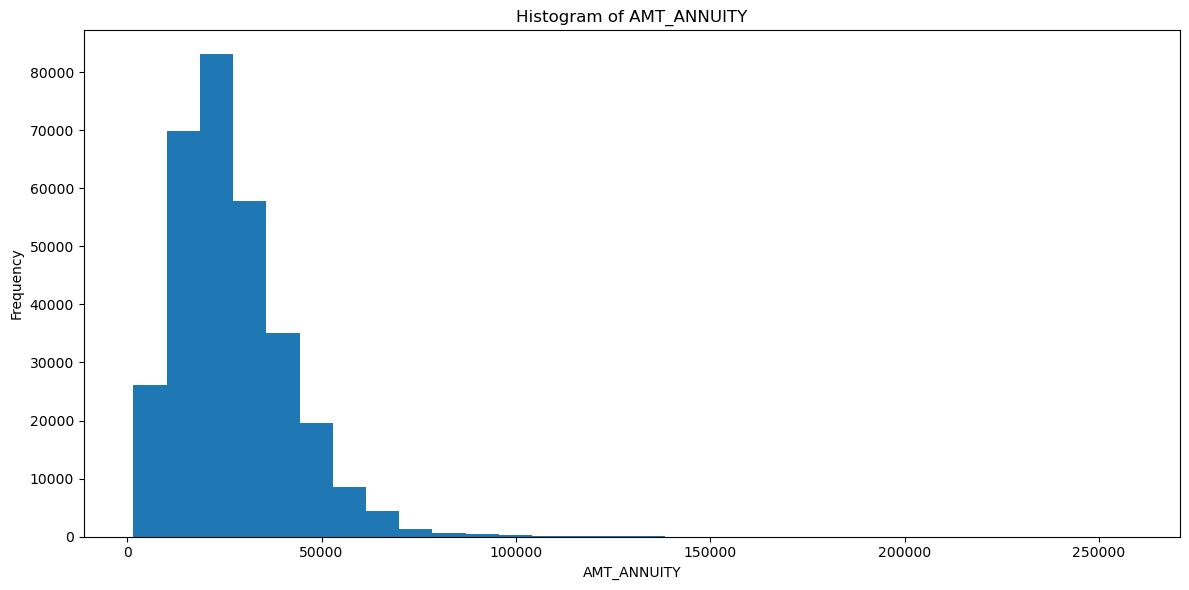

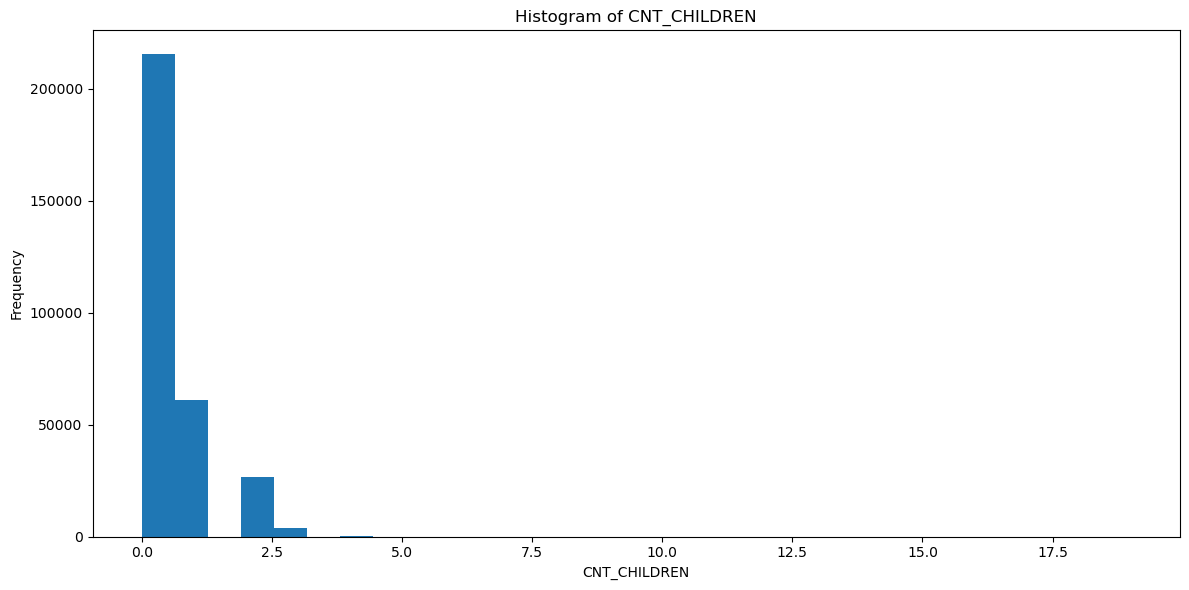

In [11]:
for feat in features:
    plt.figure(figsize=(12,6))
    plt.hist(app[feat].dropna(), bins=30)
    plt.title(f'Histogram of {feat}')
    plt.xlabel(feat)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

And the **boxplot** for grouped by `TARGET`

C:\Users\Yueyi\AppData\Local\Temp\ipykernel_5508\3670467346.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([target_0, target_1], labels=['TARGET = 0', 'TARGET = 1'])


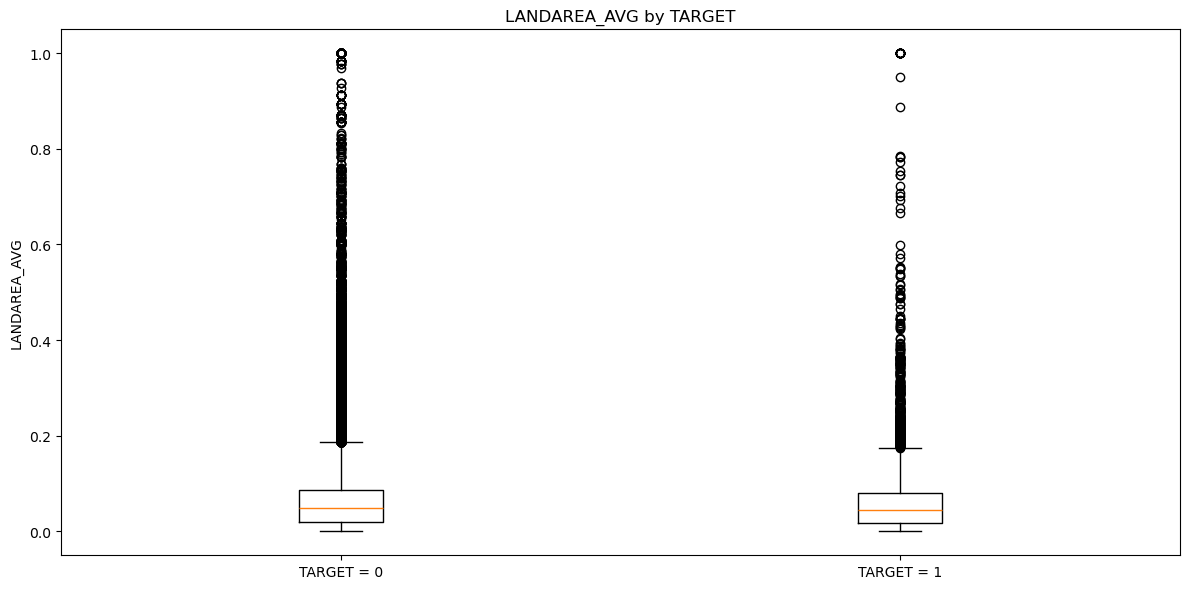

C:\Users\Yueyi\AppData\Local\Temp\ipykernel_5508\3670467346.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([target_0, target_1], labels=['TARGET = 0', 'TARGET = 1'])


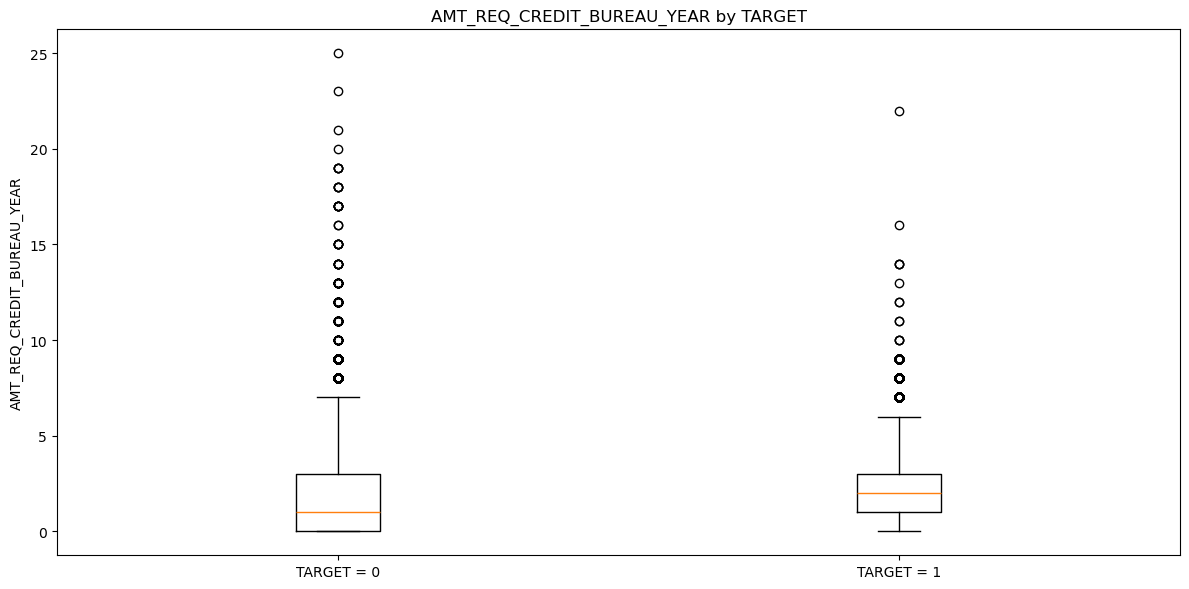

C:\Users\Yueyi\AppData\Local\Temp\ipykernel_5508\3670467346.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([target_0, target_1], labels=['TARGET = 0', 'TARGET = 1'])


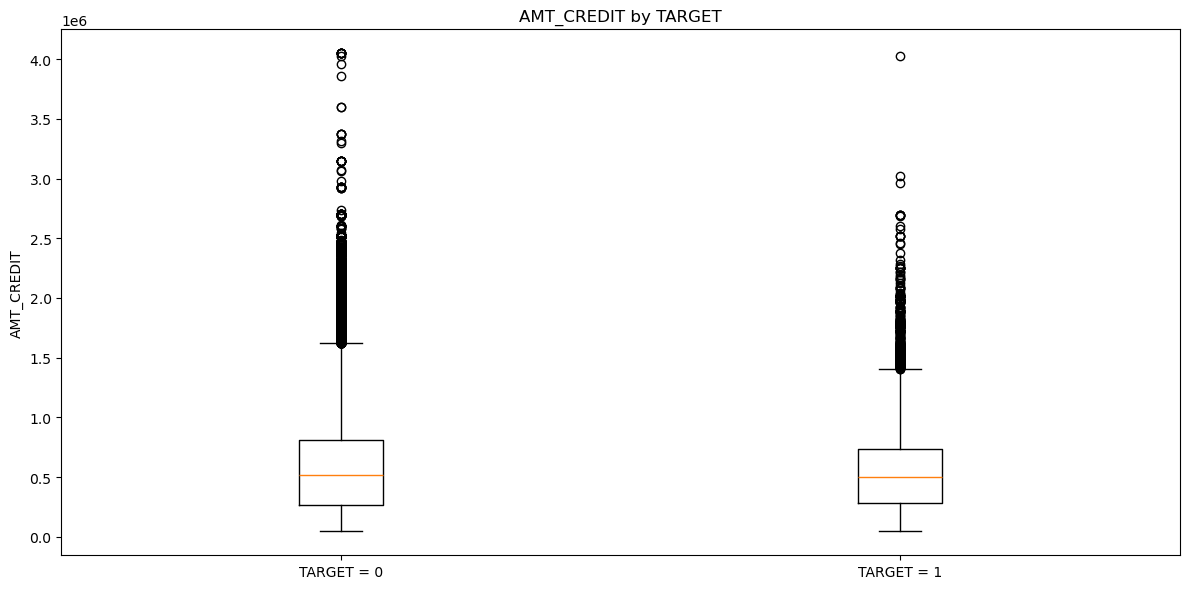

C:\Users\Yueyi\AppData\Local\Temp\ipykernel_5508\3670467346.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([target_0, target_1], labels=['TARGET = 0', 'TARGET = 1'])


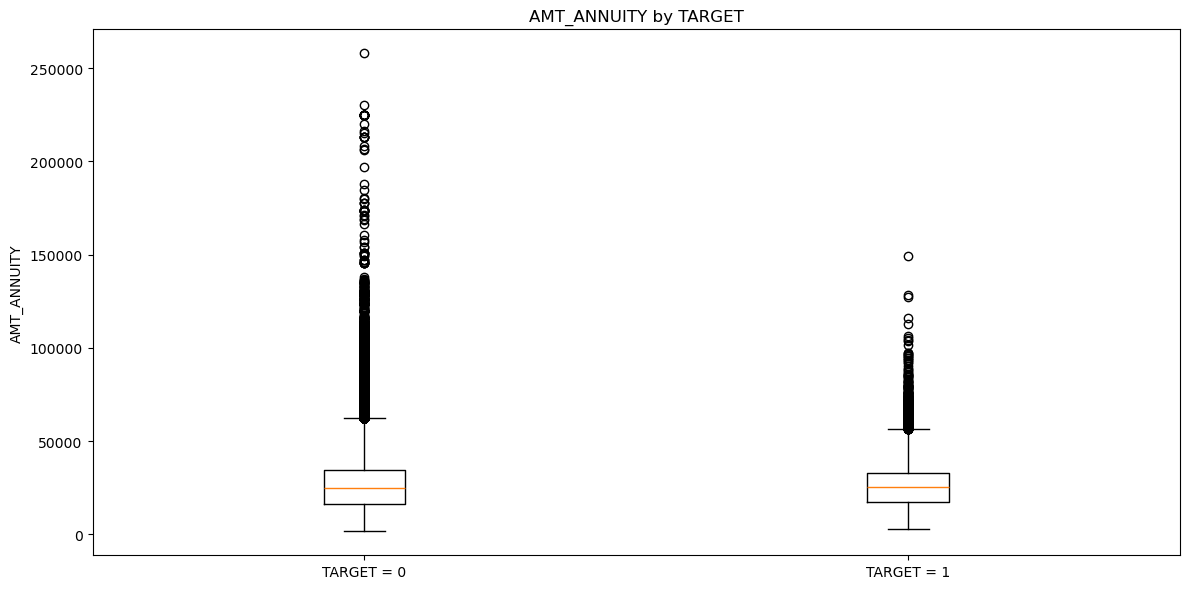

C:\Users\Yueyi\AppData\Local\Temp\ipykernel_5508\3670467346.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([target_0, target_1], labels=['TARGET = 0', 'TARGET = 1'])


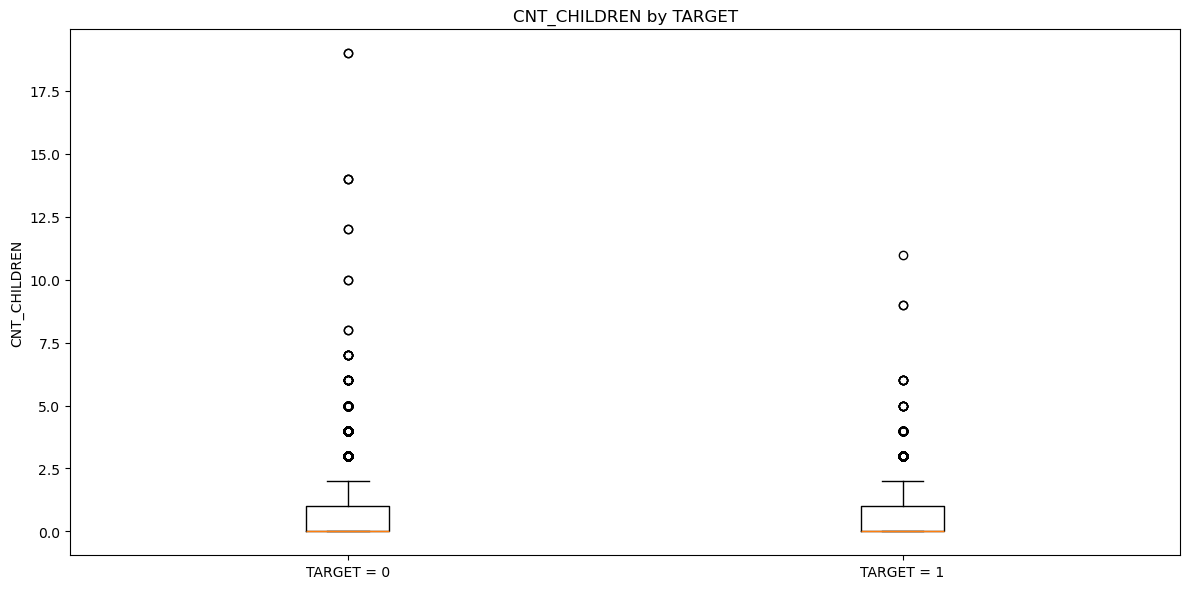

In [12]:
for feat in features:
    target_0 = app.loc[app['TARGET'] == 0, feat].dropna()
    target_1 = app.loc[app['TARGET'] == 1, feat].dropna()

    plt.figure(figsize=(12,6))
    plt.boxplot([target_0, target_1], labels=['TARGET = 0', 'TARGET = 1'])
    plt.title(f'{feat} by TARGET')
    plt.ylabel(feat)
    plt.tight_layout()
    plt.show()

Highly skewed, with a large amount of outliers, we will analysis further in the following preprocessing steps.

## 5. Outlier Analysis
Perform outlier analysis on the chosen variables.

In [13]:
#%pip install autoviz
%matplotlib inline

In [14]:
app_sub = app[features + ['TARGET']]

## 6. Transformation of Numeric Variables

Here we create a pipeline for numerical variables.

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
from sklearn.impute import SimpleImputer

First, we compute skewness

In [16]:
skews = app[features].skew().sort_values(key=abs, ascending=False)
skews

LANDAREA_AVG                  4.458677
CNT_CHILDREN                  1.974604
AMT_ANNUITY                   1.579777
AMT_REQ_CREDIT_BUREAU_YEAR    1.243590
AMT_CREDIT                    1.234778
dtype: float64

To interpret the result:
| Feature                        | Skewness | Interpretation                     |
|--------------------------------|---------:|------------------------------------|
| **LANDAREA_AVG**               |   4.46   | Extremely right‑skewed (long tail) |
| **CNT_CHILDREN**               |   1.97   | Highly right‑skewed                |
| **AMT_ANNUITY**                |   1.58   | Highly right‑skewed                |
| **AMT_REQ_CREDIT_BUREAU_YEAR** |   1.24   | Highly right‑skewed                |
| **AMT_CREDIT**                 |   1.23   | Highly right‑skewed                |

This indicates that all five variables are right‑skewed, with **LANDAREA_AVG** the worst.  

To handle this problem, we need to create a function to check and cap outliers before transformation

In [17]:
class IqrCapper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        arr = np.asarray(X, dtype=float)
        self.fences_ = []
        # Loop over columns
        for col in arr.T:
            q1 = np.nanpercentile(col, 25)
            q3 = np.nanpercentile(col, 75)
            iqr = q3 - q1
            if iqr == 0:
                # Mark “no capping” for this column
                self.fences_.append(None)
            else:
                low = q1 - 1.5 * iqr
                high = q3 + 1.5 * iqr
                self.fences_.append((low, high))
        return self

    def transform(self, X):
        arr = np.asarray(X, dtype=float).copy()
        for i, fence in enumerate(self.fences_):
            if fence is not None:
                low, high = fence
                arr[:, i] = np.clip(arr[:, i], low, high)
        return arr

### List of features

---
Here we use two different methods of transformations based on different types of features:

1. **log1p**:
    - Shrinks **large positive** values and reduces right skew, while leaving small values and zeros relatively unchanged
    - For variable that is strictly non‑negative (including zeros) and we want a simple, fixed “dampening” of heavy tail

2. **Yeo-Johnson**:
    - More flexibly “normalizes” data, which stabilizes variance and reduces skew for both positive and negative values by choosing an optimal power
    - Data may **include negative** values and we want the algorithm to learn the best power transform rather than using a fixed function


As for missing values (NaNs), we use median to impute. This is because:

1. the data of our features are **higly skewed**, replacing missing values with the median preserves a “typical” value without letting a few outliers distort the fill.
2. the distribution of our data is **not symmetric**, the median better represents the dataset’s core than the mean.

Additionally, by coupling median imputation with a binary “missing” flag, we allow the model to learn whether “being missing” itself carries predictive information.

---

In [18]:
features_log1p = ['AMT_CREDIT', 'AMT_ANNUITY']
features_yj    = ['LANDAREA_AVG', 'AMT_REQ_CREDIT_BUREAU_YEAR']
features_pass  = ['CNT_CHILDREN']

In [19]:
log1p_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('cap',     IqrCapper()),
    ('log1p',   FunctionTransformer(np.log1p, validate=False))
])
yj_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('cap',     IqrCapper()),
    ('yj',      PowerTransformer(method='yeo-johnson', standardize=False))
])
pass_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='median'))
])

In [20]:
numeric_pipeline = ColumnTransformer([
    ('log1p', log1p_pipe, features_log1p),
    ('yj',    yj_pipe,    features_yj),
    ('pass',  pass_pipe,  features_pass)
], remainder='drop', verbose_feature_names_out=False)

In [21]:
numeric_cols = features_log1p + features_yj + features_pass
X_orig = app[numeric_cols].copy() #before transformations

In [22]:
# Fit and transform numeric pipeline to get X_trans
X_orig       = app[numeric_cols]
X_trans_arr  = numeric_pipeline.fit_transform(X_orig)
X_trans      = pd.DataFrame(X_trans_arr, columns=numeric_cols, index=app.index) #after tranformations

### Outliers comparison:

In [23]:
# Compare IQR-based outliers before vs after
def iqr_counts(s):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr     = q3 - q1
    lf, uf  = q1 - 1.5*iqr, q3 + 1.5*iqr
    return pd.Series({'below': (s < lf).sum(), 'above': (s > uf).sum()})

In [24]:
stats_before = X_orig.apply(iqr_counts)
stats_after  = X_trans.apply(iqr_counts)
compare = pd.concat([stats_before.add_prefix('orig_'), stats_after.add_prefix('trans_')], axis=1)
compare.T

,below,above
orig_AMT_CREDIT,0,6562
orig_AMT_ANNUITY,0,7504
orig_LANDAREA_AVG,0,6888
orig_AMT_REQ_CREDIT_BUREAU_YEAR,0,3364
orig_CNT_CHILDREN,0,4272
trans_AMT_CREDIT,954,0
trans_AMT_ANNUITY,1822,0
trans_LANDAREA_AVG,62360,62451
trans_AMT_REQ_CREDIT_BUREAU_YEAR,0,0
trans_CNT_CHILDREN,0,4272


### Distribution **After** transformation:

In [25]:
df_viz = X_trans.copy()
df_viz["TARGET"] = app["TARGET"]

C:\Users\Yueyi\AppData\Local\Temp\ipykernel_5508\1472136899.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary    = temp.groupby('bin')["TARGET"].mean()


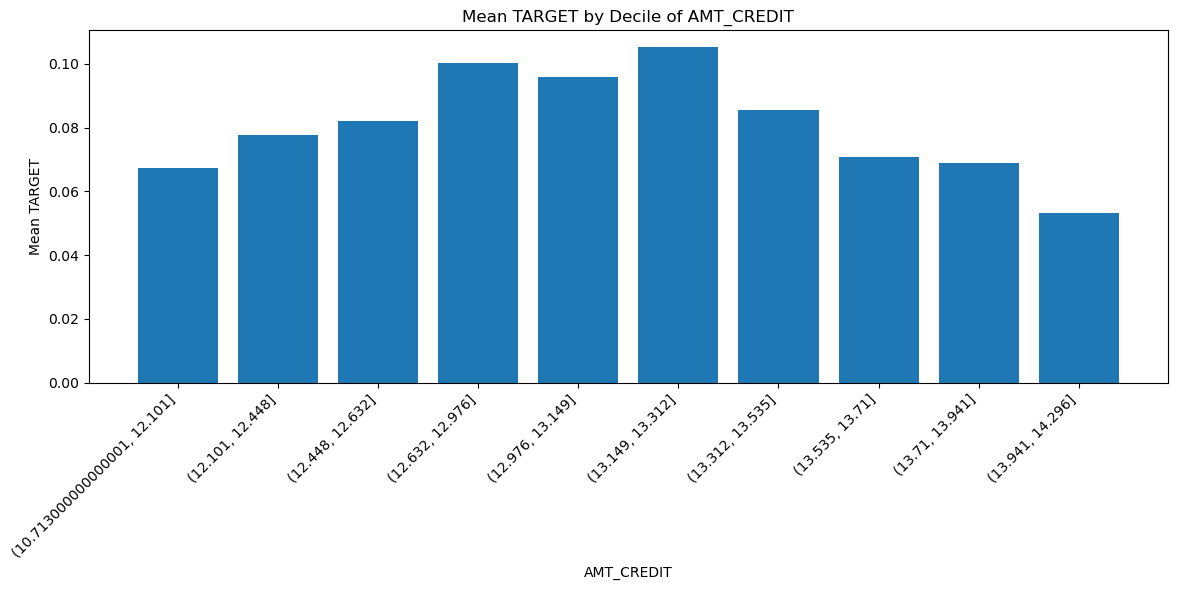

C:\Users\Yueyi\AppData\Local\Temp\ipykernel_5508\1472136899.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary    = temp.groupby('bin')["TARGET"].mean()


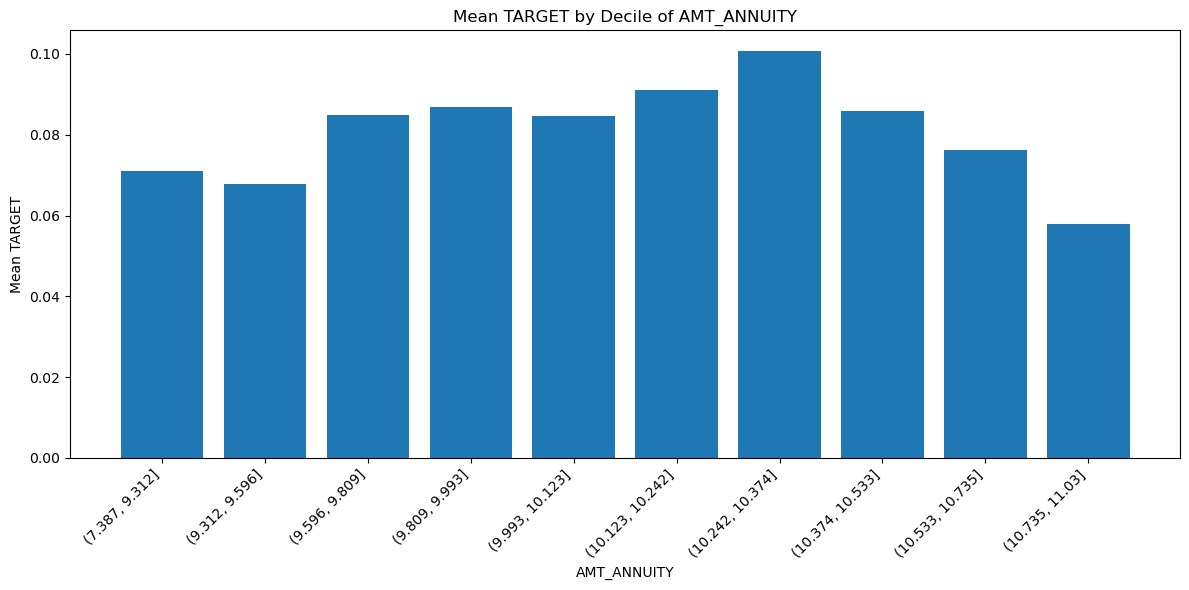

C:\Users\Yueyi\AppData\Local\Temp\ipykernel_5508\1472136899.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary    = temp.groupby('bin')["TARGET"].mean()


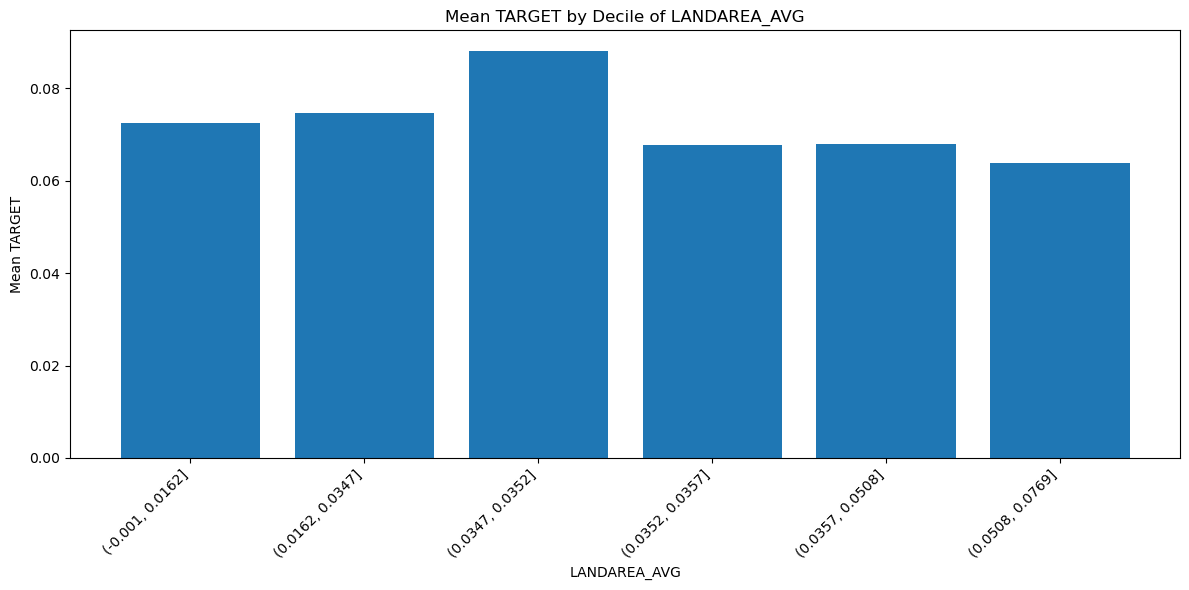

C:\Users\Yueyi\AppData\Local\Temp\ipykernel_5508\1472136899.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary    = temp.groupby('bin')["TARGET"].mean()


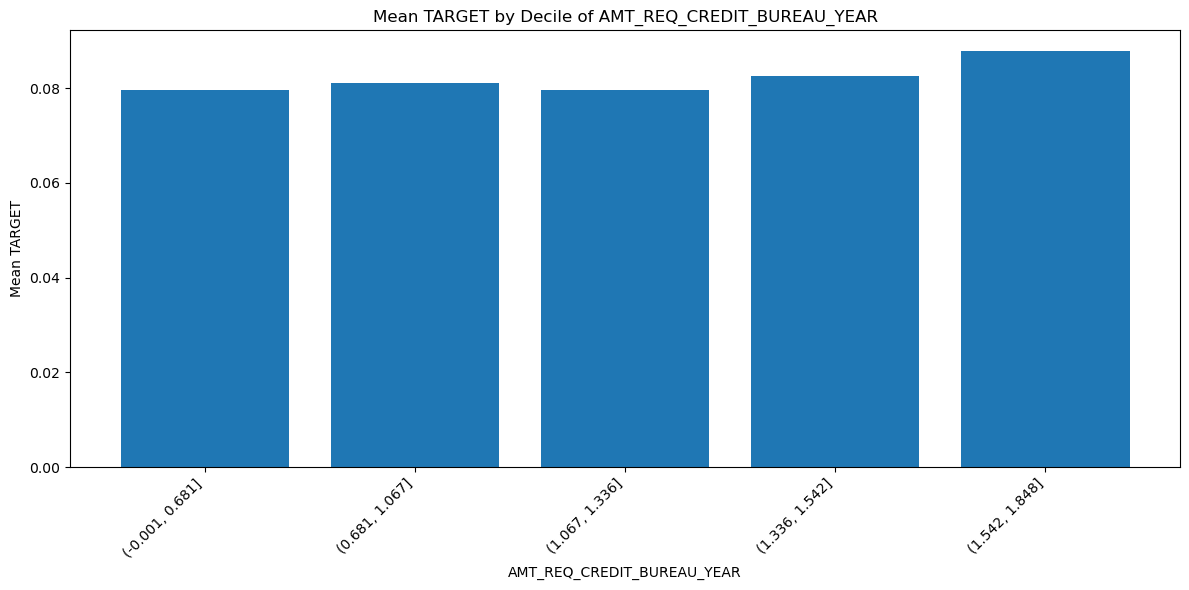

C:\Users\Yueyi\AppData\Local\Temp\ipykernel_5508\1472136899.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary    = temp.groupby('bin')["TARGET"].mean()


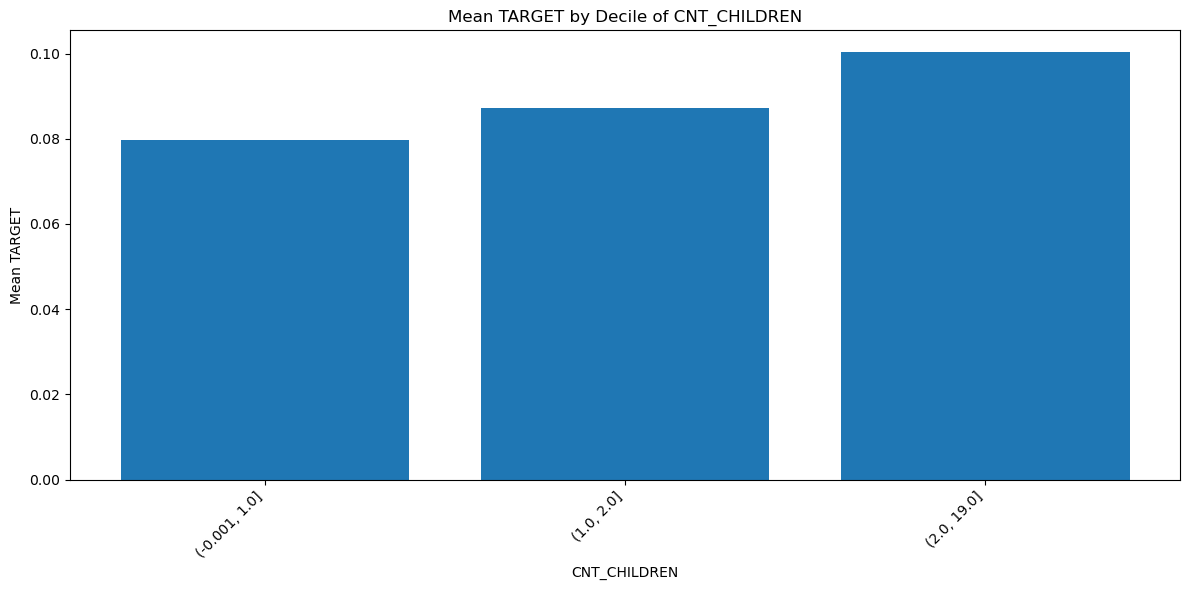

In [26]:
for col in numeric_cols:
    temp    = df_viz[[col, "TARGET"]].dropna()
    temp['bin'] = pd.qcut(temp[col], 10, duplicates='drop')
    summary    = temp.groupby('bin')["TARGET"].mean()
    plt.figure(figsize=(12,6))
    plt.bar(summary.index.astype(str), summary.values)
    plt.title(f'Mean TARGET by Decile of {col}')
    plt.xlabel(col)
    plt.ylabel(f'Mean TARGET')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Now the distribution/histogram are less skewed

## 7. Categorical Features

Check cardinality and rare values of at least five categorical features. Discuss whether each of them is ordinal or nominal. Discuss the suitable methods for encoding each of them.

In [27]:
# categorical_cols = app.select_dtypes(include=['object']).columns.tolist()
# categorical_cols

cat_features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']

In [28]:
# Check the cardinality and rare values of the above categorical features.
summary = []

for col in cat_features:
  card = app[col].nunique()
  freq = app[col].value_counts(normalize=True)
  rare = freq[freq < 0.01].index.tolist() # Define categories with the share < 5% as “rare”.
  summary.append({'feature': col,
                  'cardinality': card,
                  'rare_categories (<5%)': rare})

summary_cat = pd.DataFrame(summary)
summary_cat

,feature,cardinality,rare_categories (<5%)
0,NAME_CONTRACT_TYPE,2,[]
1,CODE_GENDER,3,[XNA]
2,NAME_INCOME_TYPE,8,"[Unemployed, Student, Businessman, Maternity l..."
3,NAME_EDUCATION_TYPE,5,[Academic degree]
4,OCCUPATION_TYPE,18,"[Low-skill Laborers, Waiters/barmen staff, Sec..."
5,ORGANIZATION_TYPE,58,"[Housing, Industry: type 11, Military, Bank, A..."


Based on the above results,

* NAME_CONTRACT_TYPE: Nominal; No rare value; Suitable for using the One-Hot Encoding method (generating two columns: Cash vs Revolving).

* CODE_GENDER: Nominal; Exists a rare value “XNA”; “XNA” is treated as a missing value and processed accordingly, then use the One-Hot Encoding method.

* NAME_INCOME_TYPE: Nominal; Exists four income types as rare values; Suitable for using the One-Hot Encoding method for common income types.

* NAME_EDUCATION_TYPE: Ordinal, since there are higher and lower levels of education; Exists one rare value “Academic degree”; Suitable for using the Ordinal Encoding method.

* OCCUPATION_TYPE: Nominal; Exists five occupational types that occupy less than 1% of the total as rare values; Suitable for using the One-Hot Encoding method for common occupation types.

* ORGANIZATION_TYPE: Nominal; Exists numerous industry categories that are rare values; Suitable for using the One-Hot Encoding method for common organization types.


Then, use Pipeline to process the six variables mentioned above, and we will process the other categorical variables similarly before final modeling.

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

%pip install -U feature-engine
from feature_engine.encoding import RareLabelEncoder
from feature_engine.outliers import Winsorizer

Note: you may need to restart the kernel to use updated packages.


In [30]:
# For nominal variables (without rare values)
nom_cat_pipe = Pipeline(steps=[("imp", SimpleImputer(strategy="constant", fill_value="missing")),
 ("ohe", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))])
# For ordinal variables
ord_cat_pipe = Pipeline(steps=[("imp", SimpleImputer(strategy="most_frequent", add_indicator=True)),
 ("ord", OrdinalEncoder())])
# For rare categories
rare_cat_pipe = Pipeline(steps=[("imp", SimpleImputer(strategy="constant", fill_value="rare")),
 ("rare", RareLabelEncoder(tol=0.05, n_categories=1)),
  ("ohe", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
])

In [31]:
nom_cat_vars = ["NAME_CONTRACT_TYPE"]
ord_cat_vars = ["NAME_EDUCATION_TYPE"]
rare_cat_vars = ["CODE_GENDER", "NAME_INCOME_TYPE", "OCCUPATION_TYPE", "ORGANIZATION_TYPE"]

In [32]:
preprocessor = ColumnTransformer(transformers=[
    ("nom", nom_cat_pipe, nom_cat_vars),
    ("ord", ord_cat_pipe, ord_cat_vars),
    ("rare", rare_cat_pipe, rare_cat_vars)
], remainder="passthrough")

preprocessor.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('nom',
                                 Pipeline(steps=[('imp',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['NAME_CONTRACT_TYPE']),
                                ('ord',
                                 Pipeline(steps=[('imp',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='most_frequent')),
                                                 ('ord', OrdinalEncoder())]),
                                 ['NAME_EDUCATION_TYPE']),
                                ('rare',
                                 Pipeline(steps=[('imp',
                                                  SimpleImputer(fill_value='rare',
                                                                strategy='constant')),
                                                 ('rare',
                                                  RareLabelEncoder(n_categories=1)),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['CODE_GENDER', 'NAME_INCOME_TYPE',
                                  'OCCUPATION_TYPE', 'ORGANIZATION_TYPE'])])

In [33]:
# app_subset = app[nom_cat_vars + ord_cat_vars + rare_cat_vars]
# processed = preprocessor.fit_transform(app_subset)
# processed.head()

## 8. Feature Engineering

Utilize previous_application.csv to compute and integrate the count of previous applications per SK_ID_CURR into application_train.csv. Further, create at least five new features from additional files, justifying their selection and aggregation method.

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin

### Feature 1 - The Number of Previous Applications

We first read the `SK_ID_CURR` column from `previous_application.csv` and group by `SK_ID_CURR` to count each client’s total historical loan applications (i.e. `prev_app_count`). We then left‑join this count series—indexed by `SK_ID_CURR`—onto `application_train.csv` so that all original records are preserved. Finally, we fill any missing `prev_app_count` values (for clients with no prior applications) with 0 and cast the column to integer.

In [35]:
class PreviousAppFeatureTransformer(BaseEstimator, TransformerMixin):
  def __init__(self, prev_app_path="previous_application.csv"):
    self.prev_app_path = prev_app_path

  def fit(self, X, y=None):
    prev = pd.read_csv(self.prev_app_path, usecols=["SK_ID_CURR"])
    # Calculate the number of occurrences of each SK_ID_CURR in previous_application.
    self.counts_ = prev["SK_ID_CURR"].value_counts().rename("prev_app_count")
    return self

  def transform(self, X):
    X = X.copy()
    X = X.merge(
        self.counts_,
        how="left",
        left_on="SK_ID_CURR",
        right_index=True
        )
    # Fill in the missing value (no history of applications) as 0.
    X["prev_app_count"] = X["prev_app_count"].fillna(0).astype(int)
    return X

  def set_output(self, transform="pandas"):
    return self

In [36]:
prev_counter = PreviousAppFeatureTransformer(prev_app_path="previous_application.csv")
prev_counter.fit(app)

app = prev_counter.transform(app)
print(app[["SK_ID_CURR", "prev_app_count"]].head())

   SK_ID_CURR  prev_app_count
0      100002               1
1      100003               3
2      100004               1
3      100006               9
4      100007               6


### Feature 2 - The Number of External Bureau Loans

**Reason to select:** the count of loans reported by other institutions reflects a client’s overall credit burden—having more external credits usually corresponds to higher default risk.

We first read the `SK_ID_CURR` column from `bureau.csv` and group by `SK_ID_CURR` to count each client’s total number of loans with other institutions (i.e. `num_bureau_loans`). We then left‑join this count series—indexed by `SK_ID_CURR`—onto application_train.csv so that all original records are preserved. Finally, we fill any missing `num_bureau_loans` values (for clients with no external loans) with 0 and cast the column to integer.

In [37]:
class BureauLoanCountTransformer(BaseEstimator, TransformerMixin):
  def __init__(self, bureau_path="bureau.csv"):
    self.bureau_path = bureau_path

  def fit(self, X, y=None):
    bureau = pd.read_csv(self.bureau_path, usecols=["SK_ID_CURR"])
    self.counts_ = bureau["SK_ID_CURR"].value_counts().rename("num_bureau_loans")
    return self

  def transform(self, X):
    X = X.copy()
    X = X.merge(
        self.counts_,
        how="left",
        left_on="SK_ID_CURR",
        right_index=True
        )
    X["num_bureau_loans"] = X["num_bureau_loans"].fillna(0).astype(int)
    return X

  def set_output(self, transform="pandas"):
    return self

In [38]:
bureau_counter = BureauLoanCountTransformer(bureau_path="bureau.csv")
bureau_counter.fit(app)

app = bureau_counter.transform(app)
print(app[["SK_ID_CURR", "num_bureau_loans"]].head())

   SK_ID_CURR  num_bureau_loans
0      100002                 8
1      100003                 4
2      100004                 2
3      100006                 0
4      100007                 1


### Feature 3 - The Bureau Overdue Month Ratio

**Reason to select:** the proportion of months in which past credits were overdue measures repayment reliability; a higher ratio indicates poorer historical payment behavior.

We first read `SK_ID_BUREAU` and `STATUS` from `bureau_balance.csv`, flag each row where `STATUS > 0` as an overdue month, and then compute the ratio of overdue months per loan (i.e. `overdue_ratio`). Next, we read `SK_ID_BUREAU` and `SK_ID_CURR` from `bureau.csv`, join to map each loan’s `overdue_ratio` back to its `SK_ID_CURR`, and then group by `SK_ID_CURR` to calculate the mean overdue ratio across all past credits (i.e. bureau_overdue_month_ratio). We left‑join this client‐level ratio onto `application_train.csv`, and fill any missing values with 0.

In [39]:
class BureauOverdueRatioTransformer(BaseEstimator, TransformerMixin):
  def __init__(self,
               bureau_balance_path="bureau_balance.csv",
               bureau_path="bureau.csv"):
    self.bal_path = bureau_balance_path
    self.bur_path = bureau_path

  def fit(self, X, y=None):
    bb = pd.read_csv(self.bal_path, usecols=["SK_ID_BUREAU", "STATUS"])
    bb["STATUS"] = pd.to_numeric(bb["STATUS"], errors="coerce")

    bb["STATUS"] = bb["STATUS"].fillna(0).astype(int)
    bb["is_overdue"] = (bb["STATUS"] > 0).astype(int)

    loan_ratio = bb.groupby("SK_ID_BUREAU")["is_overdue"].mean().rename("overdue_ratio")

    bureau = pd.read_csv(self.bur_path, usecols=["SK_ID_BUREAU", "SK_ID_CURR"])
    merged = bureau.set_index("SK_ID_BUREAU").join(loan_ratio)

    self.ratio_ = merged.groupby("SK_ID_CURR")["overdue_ratio"].mean().rename("bureau_overdue_month_ratio")
    return self

  def transform(self, X):
    X = X.copy()
    X = X.merge(
        self.ratio_,
        how="left",
        left_on="SK_ID_CURR",
        right_index=True
        )

    X["bureau_overdue_month_ratio"] = X["bureau_overdue_month_ratio"].fillna(0)
    return X

  def set_output(self, transform="pandas"):
    return self

In [40]:
overdue_transformer = BureauOverdueRatioTransformer()
overdue_transformer.fit(app)

app = overdue_transformer.transform(app)
print(app[["SK_ID_CURR", "bureau_overdue_month_ratio"]].head())

   SK_ID_CURR  bureau_overdue_month_ratio
0      100002                    0.255682
1      100003                    0.000000
2      100004                    0.000000
3      100006                    0.000000
4      100007                    0.000000


### Feature 4: The Average POS/Cash Loan Days‑Past‑Due

**Reason to select:** the mean days past due on point‑of‑sale and cash loans within Home Credit reveals how timely clients have been in repaying their own portfolio.

We first read the `SK_ID_CURR` and `SK_DPD` columns from `POS_CASH_balance.csv`, then group by `SK_ID_CURR` to compute each client’s average days‐past‐due (i.e. `pos_cash_dpd_mean`). We left‑join this mean series—indexed by `SK_ID_CURR`—onto `application_train.csv`, preserving all original records, and fill any missing `pos_cash_dpd_mean` values with 0.

In [41]:
class PosCashDpdMeanTransformer(BaseEstimator, TransformerMixin):
  def __init__(self, pos_cash_path="POS_CASH_balance.csv"):
    self.pos_cash_path = pos_cash_path

  def fit(self, X, y=None):
    df_pos = pd.read_csv(self.pos_cash_path,
                         usecols=["SK_ID_CURR", "SK_DPD"])

    self.mean_dpd_ = df_pos.groupby("SK_ID_CURR")["SK_DPD"].mean().rename("pos_cash_dpd_mean")
    return self

  def transform(self, X):
    X = X.copy()
    X = X.merge(
        self.mean_dpd_,
        how="left",
        left_on="SK_ID_CURR",
        right_index=True
        )

    X["pos_cash_dpd_mean"] = X["pos_cash_dpd_mean"].fillna(0)
    return X

  def set_output(self, transform="pandas"):
    return self

In [42]:
pos_dpd_transformer = PosCashDpdMeanTransformer()
pos_dpd_transformer.fit(app)

app = pos_dpd_transformer.transform(app)
print(app[["SK_ID_CURR", "pos_cash_dpd_mean"]].head(10))

   SK_ID_CURR  pos_cash_dpd_mean
0      100002           0.000000
1      100003           0.000000
2      100004           0.000000
3      100006           0.000000
4      100007           0.000000
5      100008         339.060241
6      100009           0.000000
7      100010           0.000000
8      100011         205.666667
9      100012           0.000000


### Feature 5 - The Average Installment Payment Gap

**Reason to select:** the average difference between amount paid and scheduled installment quantifies whether clients tend to overpay (positive gap) or underpay (negative gap), indicating repayment discipline.

We first read `SK_ID_CURR`, `AMT_INSTALMENT`, and `AMT_PAYMENT` from `instalments_payments.csv` and calculate a new column `payment_gap = AMT_PAYMENT − AMT_INSTALMENT` for each payment event. We then group by `SK_ID_CURR` to compute the average gap per client (i.e. `installment_payment_gap_mean`). This series is left‑joined onto `application_train.csv`, and any missing gaps (clients with no installment history) are filled with 0.

In [43]:
class InstallmentPaymentGapTransformer(BaseEstimator, TransformerMixin):
  def __init__(self, inst_path="installments_payments.csv"):
    self.inst_path = inst_path

  def fit(self, X, y=None):
    df_inst = pd.read_csv(self.inst_path,
                          usecols=["SK_ID_CURR", "AMT_INSTALMENT", "AMT_PAYMENT"])

    df_inst["payment_gap"] = df_inst["AMT_PAYMENT"] - df_inst["AMT_INSTALMENT"]
    self.gap_mean_ = df_inst.groupby("SK_ID_CURR")["payment_gap"].mean().rename("installment_payment_gap_mean")
    return self

  def transform(self, X):
    X = X.copy()
    X = X.merge(
        self.gap_mean_,
        how="left",
        left_on="SK_ID_CURR",
        right_index=True
        )
    X["installment_payment_gap_mean"] = X["installment_payment_gap_mean"].fillna(0)
    return X

  def set_output(self, transform="pandas"):
    return self

In [44]:
gap_transformer = InstallmentPaymentGapTransformer()
gap_transformer.fit(app)

app = gap_transformer.transform(app)
print(app[["SK_ID_CURR", "installment_payment_gap_mean"]].head(10))

   SK_ID_CURR  installment_payment_gap_mean
0      100002                      0.000000
1      100003                      0.000000
2      100004                      0.000000
3      100006                      0.000000
4      100007                   -452.384318
5      100008                   -342.461571
6      100009                      0.000000
7      100010                      0.000000
8      100011                  -2246.821962
9      100012                    866.782500


### Feature 6 - The Average Credit Card Utilization

**Reason to select:** the average ratio of balance to credit limit on previous credit cards captures credit usage pressure—higher utilization suggests tighter credit buffers and increased default risk.

We first read `SK_ID_CURR`, `AMT_BALANCE`, and `AMT_CREDIT_LIMIT_ACTUAL` from `credit_card_balance.csv`, filter out rows where the credit limit is zero or missing, and compute `a utilization ratio = AMT_BALANCE / AMT_CREDIT_LIMIT_ACTUAL`. We then group by `SK_ID_CURR` to calculate each client’s average utilization (i.e. `cc_utilization_mean`). Finally, we left‑join this utilization series onto `application_train.csv`, filling any missing `cc_utilization_mean` values with 0.

In [45]:
class CcUtilizationMeanTransformer(BaseEstimator, TransformerMixin):
  def __init__(self, cc_path="credit_card_balance.csv"):
    self.cc_path = cc_path

  def fit(self, X, y=None):
    df_cc = pd.read_csv(self.cc_path,
                        usecols=["SK_ID_CURR", "AMT_BALANCE", "AMT_CREDIT_LIMIT_ACTUAL"])

    df_cc = df_cc[df_cc["AMT_CREDIT_LIMIT_ACTUAL"] > 0].copy()
    df_cc["utilization"] = df_cc["AMT_BALANCE"] / df_cc["AMT_CREDIT_LIMIT_ACTUAL"]

    self.util_mean_ = df_cc.groupby("SK_ID_CURR")["utilization"].mean().rename("cc_utilization_mean")
    return self

  def transform(self, X):
    X = X.copy()
    X = X.merge(
        self.util_mean_,
        how="left",
        left_on="SK_ID_CURR",
        right_index=True
        )

    X["cc_utilization_mean"] = X["cc_utilization_mean"].fillna(0)
    return X

  def set_output(self, transform="pandas"):
    return self

In [46]:
cc_util_transformer = CcUtilizationMeanTransformer()
cc_util_transformer.fit(app)

app = cc_util_transformer.transform(app)
print(app[["SK_ID_CURR", "cc_utilization_mean"]].head(10))

   SK_ID_CURR  cc_utilization_mean
0      100002             0.000000
1      100003             0.000000
2      100004             0.000000
3      100006             0.000000
4      100007             0.000000
5      100008             0.000000
6      100009             0.000000
7      100010             0.000000
8      100011             0.302678
9      100012             0.000000


## 9. NaN Handling

### Numeric Variables

For numeric missing‐value imputation, we take into account two key dimensions: the overall rate of missingness and the shape of the variable’s distribution.

We partition features into four missingness bands: `< 5%`, `5 ~ 20%`, `20 ~ 50%`, and `> 50%`.

- **< 5% missing:**  
  We use simple, fast methods (mean/median/mode) to fill in these gaps, since their impact on the overall distribution and model performance is minimal.

- **5 ~ 20% missing:**  
  We choose the imputation strategy based on each **feature’s distribution**.  
  - For heavily right‑skewed variables (e.g. `AMT_CREDIT`, `AMT_ANNUITY`), we impute with the **median**.  
  - For roughly symmetric variables, we impute with the **mean**.

- **20 ~ 50% missing:**  
  Here we also consider the missingness mechanism.  
  - If a variable is **Missing At Random (MAR)**, then drawing values at random from its observed distribution can be effective.  
  - If a variable is **Missing Not At Random (MNAR)**, we may need more flexible approaches (e.g. KNN imputation), though no MNAR patterns currently appear in our data.

- **> 50% missing:**  
  First we check whether “missing” carries meaning (for example, NaN might indicate “none” rather than “unknown”). If so, we treat the missing group as its own segment in a stratified analysis. Only after that can we decide whether to retain the feature or drop it entirely.

In [47]:
# example features
skewed_num_features      = ['AMT_CREDIT', 'AMT_ANNUITY']
low_var_num_features     = ['CNT_CHILDREN']                # e.g. low variance ones
norm_num_features        = ['DAYS_EMPLOYED', 'OWN_CAR_AGE']  # e.g. roughly normal
med_miss_num_features    = ['TOTAL_INCOME']                # 20–50% missing
disc_num_features        = ['EXT_SOURCE_1']                # >50% missing or many outliers
# Variables with 5~20% missing values:
## Pipeline for Skewed numeric variables
skewed_num_pipe  = Pipeline(steps = [("imp", SimpleImputer(strategy= "median")),
                                     ("out", Winsorizer(capping_method='quantiles', tail='both', fold=.06))])

## Pipeline for Low variance numeric variables
low_var_pipe = Pipeline(steps = [("imp", SimpleImputer(strategy="constant", fill_value=0)),
                                 ("out", Winsorizer(capping_method='gaussian', tail='both', fold=3))])

## Pipeline for normally distributed numeric variables
norm_num_pipe = Pipeline(steps = [("imp", SimpleImputer(strategy= "mean", add_indicator= True))])

# Variables with 20-50% missing values
med_miss_num_pipe = Pipeline([('imp', SimpleImputer(strategy='constant',fill_value=-999, add_indicator=True))])

# Variables with over 50% missing, or with a great amount of outliers
## Pipeline for variables that need discretization - We decide which ones to discretize based on logic
disc_pipe = Pipeline(steps = [("imp", SimpleImputer(strategy= "median", add_indicator= True)),
                              ("disc", KBinsDiscretizer(strategy= "equal_width", encode = "ordinal"))])

num_preprocessor = ColumnTransformer([
    ('skewed',  skewed_num_pipe,   skewed_num_features),
    ('lowvar',  low_var_pipe,      low_var_num_features),
    ('normal',  norm_num_pipe,     norm_num_features),
    ('medmiss', med_miss_num_pipe, med_miss_num_features),
    ('disc',    disc_pipe,         disc_num_features),], remainder='passthrough')

num_preprocessor.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('skewed',
                                 Pipeline(steps=[('imp',
                                                  SimpleImputer(strategy='median')),
                                                 ('out',
                                                  Winsorizer(capping_method='quantiles',
                                                             fold=0.06,
                                                             tail='both'))]),
                                 ['AMT_CREDIT', 'AMT_ANNUITY']),
                                ('lowvar',
                                 Pipeline(steps=[('imp',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('out',
                                                  Winsorizer(fold=3,
                                                             tail='both'))]),
                                 ['C...
                                                  SimpleImputer(add_indicator=True))]),
                                 ['DAYS_EMPLOYED', 'OWN_CAR_AGE']),
                                ('medmiss',
                                 Pipeline(steps=[('imp',
                                                  SimpleImputer(add_indicator=True,
                                                                fill_value=-999,
                                                                strategy='constant'))]),
                                 ['TOTAL_INCOME']),
                                ('disc',
                                 Pipeline(steps=[('imp',
                                                  SimpleImputer(add_indicator=True,
                                                                strategy='median')),
                                                 ('disc',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   strategy='equal_width'))]),
                                 ['EXT_SOURCE_1'])])

### Categorical Variables

For categorical missing‐value imputation we can mirror the four “bands” approach used for numerics,
* **< 5% missing:**
  
  We impute with the most frequent category (mode).

* **5 ~ 20% missing:**

  We impute with a new category, e.g. "Missing" (constant).

* **20 ~ 50% missing:**

  We still treat it as its own "Missing" category, but consider adding a binary indicator or even a KNN‑/model‑based imputer if it is suspected to be MAR.

* **> 50% missing:**

  First ask whether “missing” really means “none” (e.g. no phone number - literal none). If so, keep it as "None". Otherwise, treat as "Missing" category or drop the variable if it proves uninformative.

In [48]:
# Still use pipeline to process the categorical missing‐values.
# 1) Low‐missing (<5%) categories - fill with mode
low_miss_cat_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
    ])

# 2) Moderate‐missing (5–20%) - fill with explicit 'Missing'
med_miss_cat_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="constant", fill_value="Missing")),
    ("ohe", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
    ])

# 3) High‐missing (20–50%) - same as moderate, plus indicator if desired
high_miss_cat_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="constant", fill_value="Missing", add_indicator=True)),
    ("ohe", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
    ])

# 4) Very‐high‐missing (>50%) - treat as separate category or drop
very_high_miss_cat_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="constant", fill_value="Missing")),
    ("ohe", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
    ])

cat_preprocessor = ColumnTransformer([
    # e.g. these lists you determine by checking df[col].isna().mean()
    ("low",  low_miss_cat_pipe, ["NAME_CONTRACT_TYPE"]), # < 5% missing
    ("med",  med_miss_cat_pipe, ["CODE_GENDER", "NAME_INCOME_TYPE"]), # 5–20%
    ("high", high_miss_cat_pipe, ["OCCUPATION_TYPE"]), # 20–50%
    ("vhigh",very_high_miss_cat_pipe, ["ORGANIZATION_TYPE"]) # > 50% or drop‑candidate
], remainder="passthrough")

cat_preprocessor.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('low',
                                 Pipeline(steps=[('imp',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['NAME_CONTRACT_TYPE']),
                                ('med',
                                 Pipeline(steps=[('imp',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore...
                                 Pipeline(steps=[('imp',
                                                  SimpleImputer(add_indicator=True,
                                                                fill_value='Missing',
                                                                strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['OCCUPATION_TYPE']),
                                ('vhigh',
                                 Pipeline(steps=[('imp',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['ORGANIZATION_TYPE'])])

We monitored missing‑value rates with `AutoViz()` and performed an initial analysis based on that output. The actual imputation logic, that is, whether median/mean for numerics or constant/most‑frequent for categoricals, is already encapsulated in the pipelines under the `"impute"` steps.

In [49]:
# app = pd.read_csv("application_train.csv")

In [50]:
# app = prev_counter.transform(app)
# app = bureau_counter.transform(app)
# app = overdue_transformer.transform(app)
# app = pos_dpd_transformer.transform(app)
# app = gap_transformer.transform(app)
# app = cc_util_transformer.transform(app)

In [51]:
# app.head()

In [52]:
# numeric_features = features_log1p + features_yj + features_pass
# X_num_trans = numeric_pipeline.fit_transform(app[numeric_features])
# df_num_trans = pd.DataFrame(X_num_trans, columns=numeric_features, index=app.index)

In [53]:
# categorical_vars = nom_cat_vars + ord_cat_vars + rare_cat_vars
# df_cat_trans = preprocessor.fit_transform(app[categorical_vars])

In [54]:
# app_modified = pd.concat([
    # app[["SK_ID_CURR", "TARGET"]].reset_index(drop=True),
    # df_num_trans.reset_index(drop=True),
    # df_cat_trans.reset_index(drop=True)
# ], axis=1)

In [55]:
# output_path = "application_train_modified.csv"
# app_modified.to_csv(output_path, index=False)
# print(f"Modified data has been written to: {output_path}")

# Kaggle Home Credit Default Risk [Phase 2]

## **1. Identify which type of machine learning problem is it?**

Since the outcome variable is `TARGET`, which is used to represent whether a loan will default (1) or not (0). So this variable is labeled and binary, indicating that this problem is belong to **binary classification problem in supervised learning**.

## **2. Suggested models with pros and cons**

### **Model 1: Logistic Regression with Regularization (LASSO/Ridge)**
**Pros**:  

1.   Each feature has a clear coefficient, which is easy to interpret.
2.   Regularization will help a lot with high dimensionality (more than 120 variables in dataset).
3.   Less likely to overfit with high-dimensional data when regularized.

**Cons**:

1.   May not capture complex non-linear relationships between variables.
2.   More Sensitive to highly correlated features.

### **Model 2: XGBoost**
**Pros**:  

1.   Perform well on tabular data with many features.
2.   Handle mixed data types and missing values well.
3.   Can capture complex non-linear relationships.

**Cons**:

1.   A lot of hyperparameters need to tune compared to simple models.
2.   Risk of overfitting if not properly regularized.
3.   When processing large datasets, the amount of computation can be very large, resulting in reduced efficiency.

### **Model 3: Random Forest**
**Pros**:  

1.   Handle high-dimensional data well without feature scaling.
2.   Less likely to overfit than single decision tree.
3.   Handle missing values and outliers effectively.

**Cons**:

1.   Less efficient at capturing linear relationships than some other models.
2.   May have trouble handling categorical features with lots of categories or different values.

## **3. Combine the train dataset with 5 new variables engineered during the EDA.**

In [56]:
app = pd.read_csv("application_train.csv")

In [57]:
app = prev_counter.transform(app)
app = bureau_counter.transform(app)
app = overdue_transformer.transform(app)
app = pos_dpd_transformer.transform(app)
app = gap_transformer.transform(app)
app = cc_util_transformer.transform(app)

In [58]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,prev_app_count,num_bureau_loans,bureau_overdue_month_ratio,pos_cash_dpd_mean,installment_payment_gap_mean,cc_utilization_mean
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,1.0,1,8,0.255682,0.0,0.000000,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,3,4,0.000000,0.0,0.000000,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,1,2,0.000000,0.0,0.000000,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,9,0,0.000000,0.0,0.000000,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,6,1,0.000000,0.0,-452.384318,0.0


## **4. Identify the data preparation steps required.**

**1. Load and validate keys:** Read application_train.csv, then confirm whether SK_ID_CURR is a true primary key by comparing its unique count to the total row count.

**2. Target‐balance check:** Tabulate and visualize the unique values in TARGET, computing their proportions to assess class imbalance.

**3. Split by type:** Divide features into numerical and categorical sets.

**4. Numeric preprocessing:**

- Compute summary statistics and plot histograms for all numeric variables to detect skewness and outliers.

- Calculate a Pearson correlation matrix, identify the top five predictors of TARGET, and select a subset of variables for deeper analysis.

- For severely skewed features, apply transformations (e.g., log or Box–Cox), then re-evaluate distributions and target relationships via bar or box plots.

- Handle outliers through winsorization or IQR-based trimming and document differences before/after.

**5. Categorical preprocessing:**

- For at least five key categorical variables, inspect cardinality and rare‐level frequencies.

- Merge levels occurring below a frequency threshold into an “Other” category or treat them as missing.

- Identify each variable as nominal or ordinal, then apply One-Hot encoding for nominals and Ordinal encoding for ordinals.

**6. Missing value handling**

## **5. Preprocessoring and data handling.**

Yes, we will impute missing values at inference time. In phase 1, we have developed different methods to handle missing values based on their attibutes and distribution. Now we need to classify all variables according to the predefined criteria and then use different processing pipelines for them.

In [59]:
# Calculate missing rate in each column
missing_rates = (app.isnull().sum() / len(app))*100
below_5 = [col for col, rate in missing_rates.items() if rate < 0.05]
btw_5_20 = [col for col, rate in missing_rates.items() if 0.05 <= rate < 0.2]
btw_20_50 = [col for col, rate in missing_rates.items() if 0.2 <= rate < 0.5]
above_50 = [col for col, rate in missing_rates.items() if rate >= 0.5]
print("Columns with <5% missing values:")
for col in below_5:
    print(f"  - {col}")

print("\nColumns with 5-20% missing values:")
for col in btw_5_20:
    print(f"  - {col}")

print("\nColumns with 20-50% missing values:")
for col in btw_20_50:
    print(f"  - {col}")

print("\nColumns with >50% missing values:")
for col in above_50:
    print(f"  - {col}")

Columns with <5% missing values:
  - SK_ID_CURR
  - TARGET
  - NAME_CONTRACT_TYPE
  - CODE_GENDER
  - FLAG_OWN_CAR
  - FLAG_OWN_REALTY
  - CNT_CHILDREN
  - AMT_INCOME_TOTAL
  - AMT_CREDIT
  - AMT_ANNUITY
  - NAME_INCOME_TYPE
  - NAME_EDUCATION_TYPE
  - NAME_FAMILY_STATUS
  - NAME_HOUSING_TYPE
  - REGION_POPULATION_RELATIVE
  - DAYS_BIRTH
  - DAYS_EMPLOYED
  - DAYS_REGISTRATION
  - DAYS_ID_PUBLISH
  - FLAG_MOBIL
  - FLAG_EMP_PHONE
  - FLAG_WORK_PHONE
  - FLAG_CONT_MOBILE
  - FLAG_PHONE
  - FLAG_EMAIL
  - CNT_FAM_MEMBERS
  - REGION_RATING_CLIENT
  - REGION_RATING_CLIENT_W_CITY
  - WEEKDAY_APPR_PROCESS_START
  - HOUR_APPR_PROCESS_START
  - REG_REGION_NOT_LIVE_REGION
  - REG_REGION_NOT_WORK_REGION
  - LIVE_REGION_NOT_WORK_REGION
  - REG_CITY_NOT_LIVE_CITY
  - REG_CITY_NOT_WORK_CITY
  - LIVE_CITY_NOT_WORK_CITY
  - ORGANIZATION_TYPE
  - DAYS_LAST_PHONE_CHANGE
  - FLAG_DOCUMENT_2
  - FLAG_DOCUMENT_3
  - FLAG_DOCUMENT_4
  - FLAG_DOCUMENT_5
  - FLAG_DOCUMENT_6
  - FLAG_DOCUMENT_7
  - FLAG_DOCUM

#### Preprocessing of **numeric variables** and the corresponding missing value handling

In [60]:
# <5% missing numeric
below_5_num = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE']
# 5%~20% missing numeric
btw_5_20_num = ['AMT_GOODS_PRICE']
# 20%~50% missing numeric
btw_20_50_num = ['EXT_SOURCE_2','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']

In [61]:
above_50_num = ['OWN_CAR_AGE','EXT_SOURCE_1','EXT_SOURCE_3','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG',
                'NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE',
                'NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI',
                'NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','TOTALAREA_MODE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

In [62]:
num_variables_pre = below_5_num + btw_5_20_num + btw_20_50_num + above_50_num
num_variables = num_variables_pre +  ['prev_app_count', 'num_bureau_loans', 'bureau_overdue_month_ratio','pos_cash_dpd_mean', 'installment_payment_gap_mean','cc_utilization_mean']
len(num_variables)

74

### **1. Data Inspection**
---

In [63]:
numeric_app= app[num_variables]
correlation_matrix = numeric_app.corr(method='pearson')
correlation_matrix

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,prev_app_count,num_bureau_loans,bureau_overdue_month_ratio,pos_cash_dpd_mean,installment_payment_gap_mean,cc_utilization_mean
AMT_INCOME_TOTAL,1.000000,0.156870,0.191657,0.074796,0.027261,-0.064223,0.027805,0.008506,0.016342,-0.018585,...,0.002387,0.024700,0.004859,0.011690,0.020956,0.052915,0.006694,-0.001396,0.021484,0.012572
AMT_CREDIT,0.156870,1.000000,0.770138,0.099738,-0.055436,-0.066838,0.009621,-0.006575,0.063160,-0.073701,...,-0.001275,0.054451,0.015925,-0.048448,-0.031348,0.064701,-0.013590,0.005028,0.060557,-0.002092
AMT_ANNUITY,0.191657,0.770138,1.000000,0.118429,0.009445,-0.104332,0.038514,0.011268,0.075539,-0.063747,...,0.013881,0.039148,0.010124,-0.011320,-0.006948,0.024788,0.027824,0.004566,0.042108,-0.013581
REGION_POPULATION_RELATIVE,0.074796,0.099738,0.118429,1.000000,-0.029582,-0.003980,-0.053820,-0.003993,-0.024209,-0.044013,...,-0.002149,0.078607,-0.001279,0.001003,-0.009404,-0.037717,0.003119,0.003553,0.007540,0.013852
DAYS_BIRTH,0.027261,-0.055436,0.009445,-0.029582,1.000000,-0.615864,0.331912,0.272691,0.278894,0.082939,...,-0.001336,0.001372,-0.011799,-0.071983,-0.071588,-0.069361,0.020767,-0.014460,-0.039267,0.020180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
num_bureau_loans,0.052915,0.064701,0.024788,-0.037717,-0.069361,-0.015614,0.010704,-0.111315,0.028088,-0.137039,...,0.012328,0.146442,0.004193,0.033216,0.193478,1.000000,0.006973,0.004108,0.017535,0.040114
bureau_overdue_month_ratio,0.006694,-0.013590,0.027824,0.003119,0.020767,-0.011945,0.009038,0.006820,0.004290,0.002959,...,0.018320,0.010462,0.001172,0.010930,0.021707,0.006973,1.000000,0.030007,-0.037022,0.018329
pos_cash_dpd_mean,-0.001396,0.005028,0.004566,0.003553,-0.014460,0.004696,-0.006162,-0.004807,0.002206,-0.013879,...,0.001670,0.000718,-0.001243,-0.010233,-0.013383,0.004108,0.030007,1.000000,-0.003345,-0.001492
installment_payment_gap_mean,0.021484,0.060557,0.042108,0.007540,-0.039267,0.013385,-0.007217,-0.012277,-0.002792,-0.008508,...,0.001295,0.000453,0.024204,0.075509,0.059265,0.017535,-0.037022,-0.003345,1.000000,-0.026961


In [71]:
# Numerical Variables with 5 New Features
numeric_feature = ['AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 'REGION_POPULATION_RELATIVE',
                   'DAYS_LAST_PHONE_CHANGE', 'EXT_SOURCE_2', 'OWN_CAR_AGE',
                   'EXT_SOURCE_1', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_MON',
                   'CNT_FAM_MEMBERS', 'AMT_REQ_CREDIT_BUREAU_DAY',
                   'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'ELEVATORS_AVG',
                   'YEARS_BUILD_AVG', 'AMT_GOODS_PRICE', 'FLOORSMAX_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
                   'DEF_60_CNT_SOCIAL_CIRCLE', 'ENTRANCES_MEDI', 'LANDAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
                   'BASEMENTAREA_AVG', 'COMMONAREA_AVG', 'NONLIVINGAREA_AVG', 'YEARS_BEGINEXPLUATATION_MODE',
                   'bureau_overdue_month_ratio', 'pos_cash_dpd_mean', 'installment_payment_gap_mean',
                   'cc_utilization_mean','prev_app_count'] # variables highly correlated with TARGET along with 5 new features

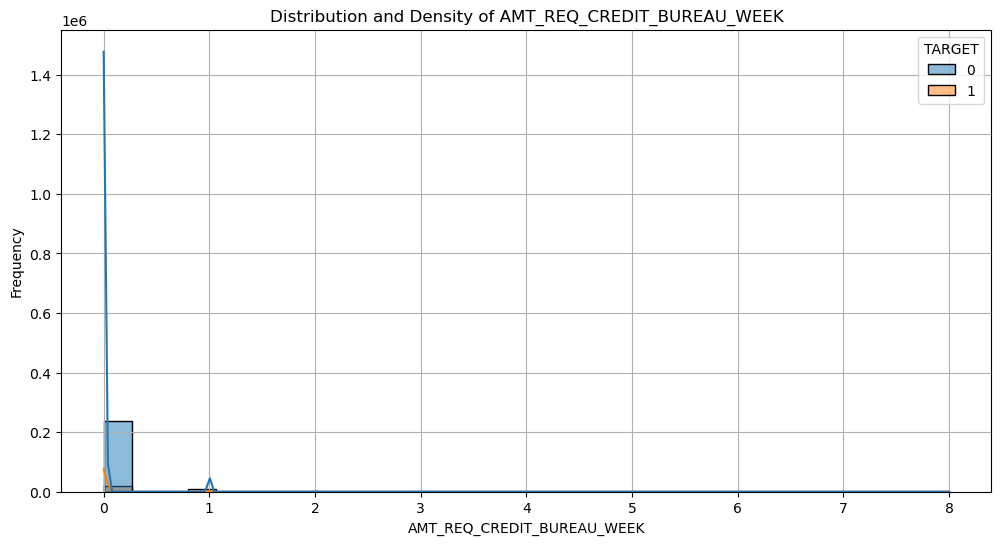

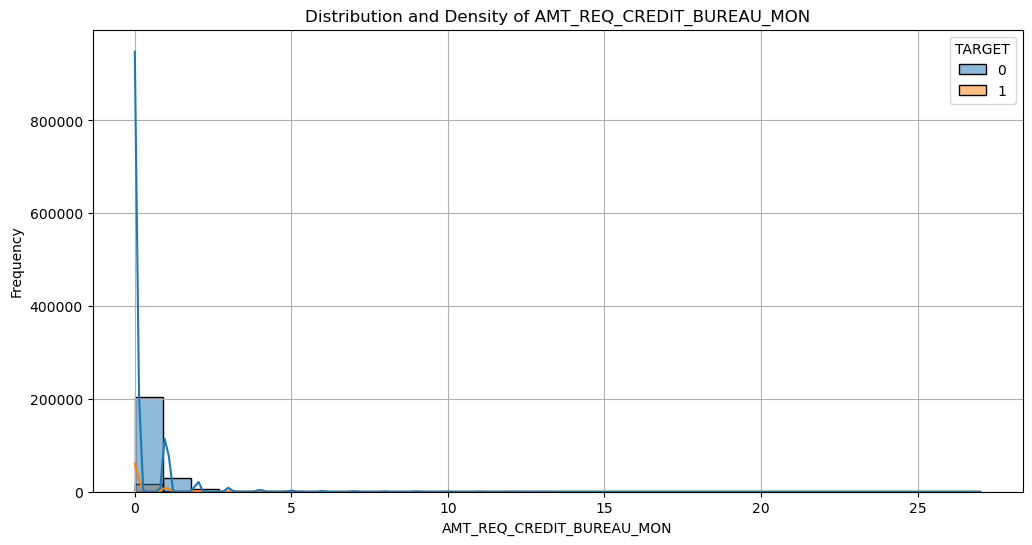

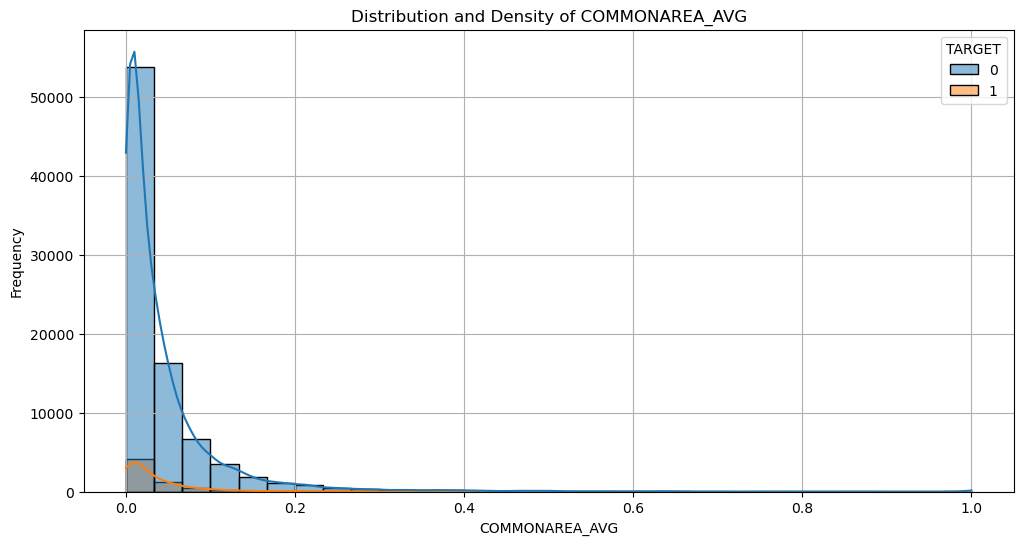

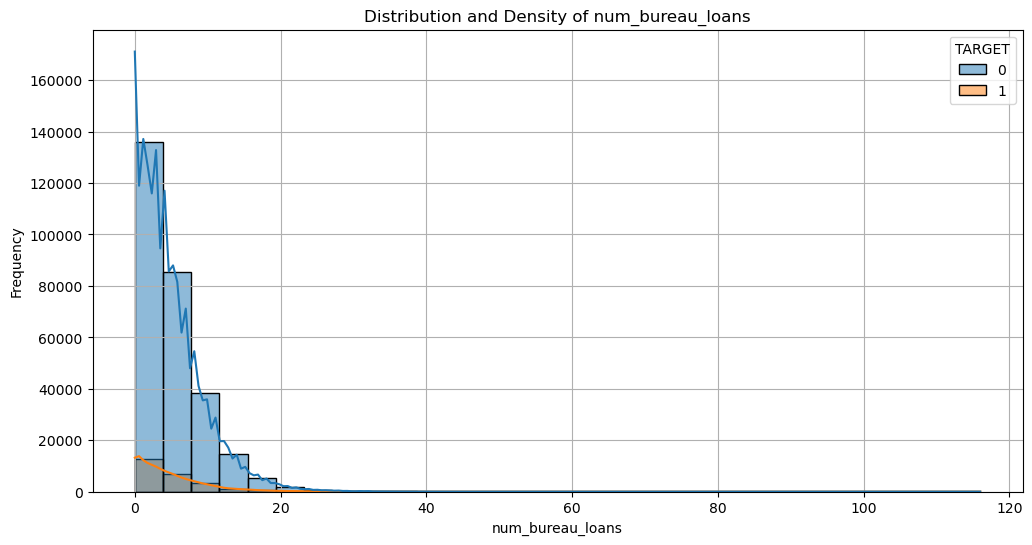

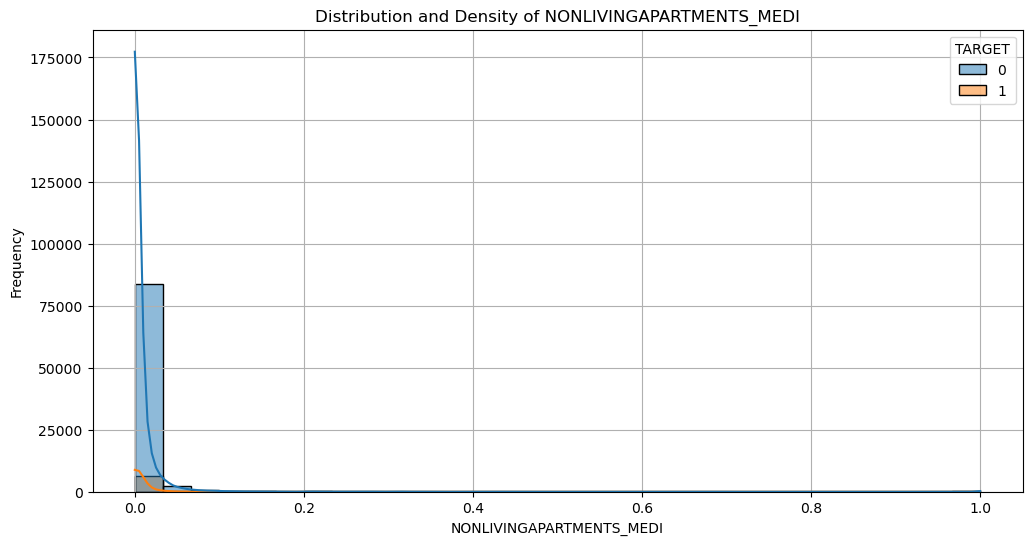

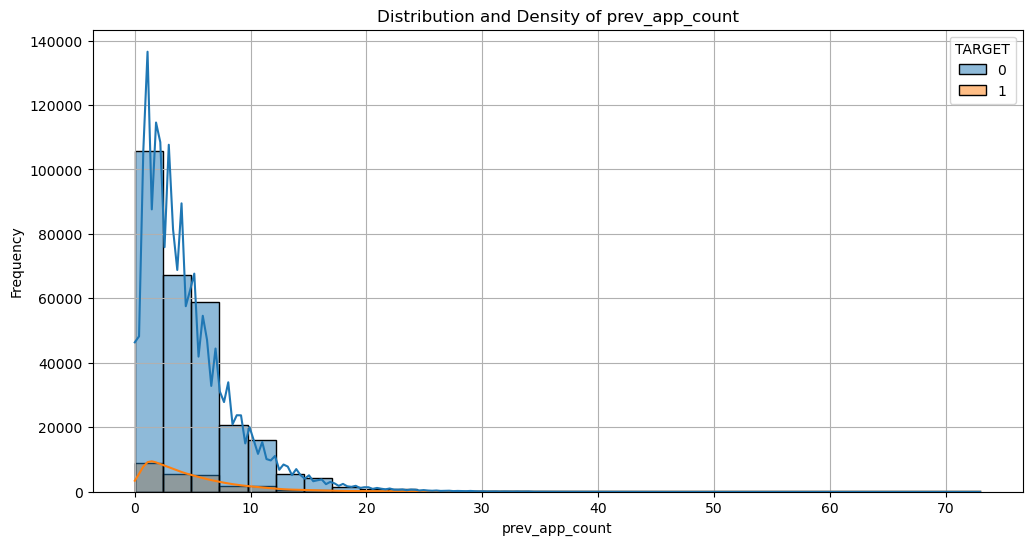

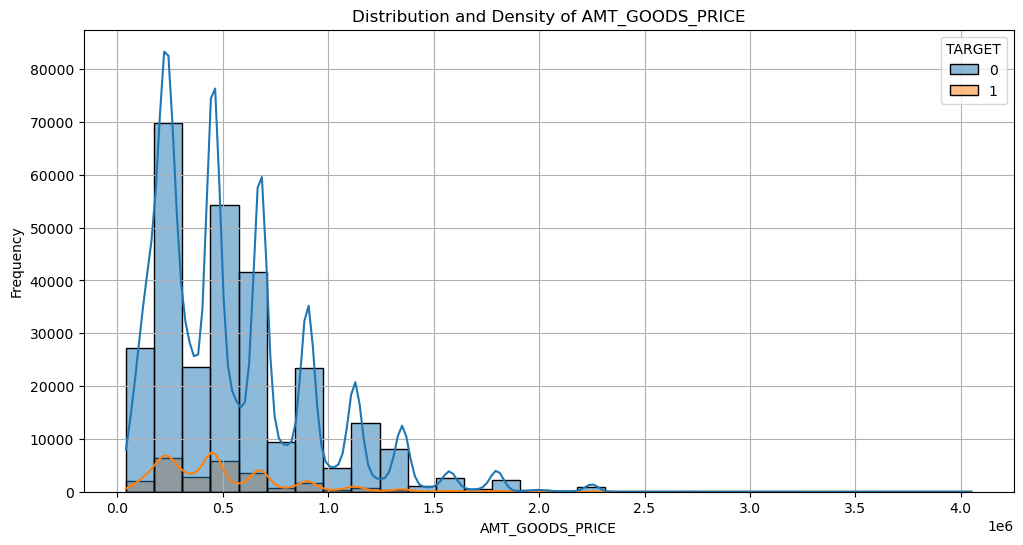

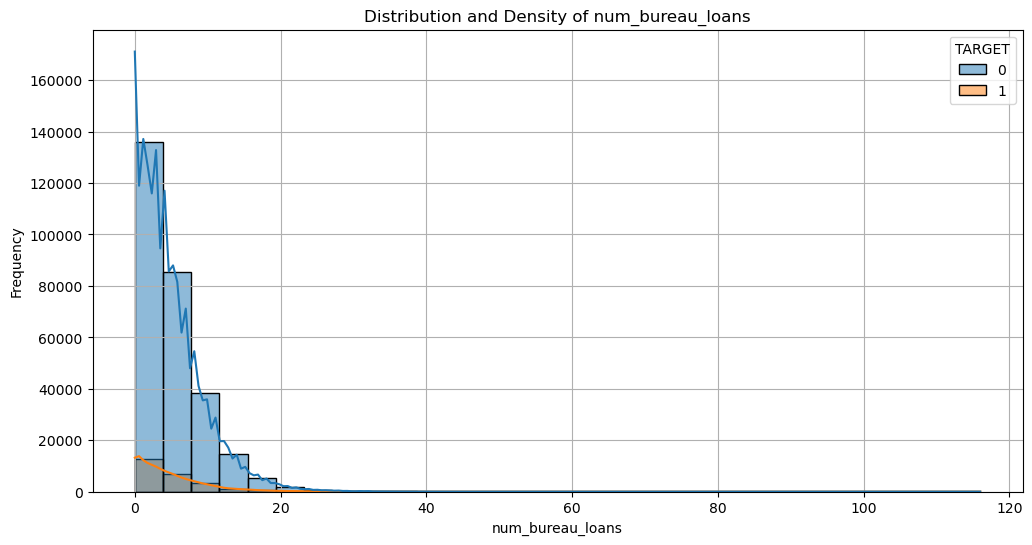

In [72]:
cols_to_check = ['AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'COMMONAREA_AVG', 'num_bureau_loans', 'NONLIVINGAPARTMENTS_MEDI','prev_app_count','AMT_GOODS_PRICE','num_bureau_loans']

for col in cols_to_check:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=app, x=col, kde=True, bins=30,hue='TARGET')
    plt.title(f'Distribution and Density of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

Again, we treat different variables based on their distribution. Also, it is obvious that the data is highly imbalanced (most of the data are `TARGET = 0`)

### **2. Transformation of Distribution**
---

In [73]:
%pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [74]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(transform_output="pandas")

Before applying distribution transformations, it’s better to **first cap outliers** for best practice.

In [75]:
class IqrCapper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        if isinstance(X, pd.DataFrame):
            self.columns_ = X.columns
            arr = X.values
        else:
            self.columns_ = None
            arr = np.asarray(X, dtype=float)

        self.fences_ = []
        for col in arr.T:
            q1 = np.nanpercentile(col, 25)
            q3 = np.nanpercentile(col, 75)
            iqr = q3 - q1
            if iqr == 0:
                self.fences_.append(None)
            else:
                low = q1 - 1.5 * iqr
                high = q3 + 1.5 * iqr
                self.fences_.append((low, high))
        return self

    def transform(self, X):
        is_df = isinstance(X, pd.DataFrame)
        arr = X.values if is_df else np.asarray(X, dtype=float)
        arr = arr.copy()

        for i, fence in enumerate(self.fences_):
            if fence is not None:
                low, high = fence
                arr[:, i] = np.clip(arr[:, i], low, high)

        if is_df:
            return pd.DataFrame(arr, columns=self.columns_, index=X.index)
        return arr

    def get_feature_names_out(self, input_features=None):
        if input_features is not None:
            return np.array(input_features)
        elif hasattr(self, 'columns_') and self.columns_ is not None:
            return self.columns_
        else:
            return np.array([])

In [76]:
capper = IqrCapper()

---
Here we use two different methods of transformations based on different types of features:

1. **log1p**:
    - Shrinks **large positive** values and reduces right skew, while leaving small values and zeros relatively unchanged
    - For variable that is strictly non‑negative (including zeros) and we want a simple, fixed “dampening” of heavy tail

2. **Yeo-Johnson**:
    - More flexibly “normalizes” data, which stabilizes variance and reduces skew for both positive and negative values by choosing an optimal power
    - Data may **include negative** values and we want the algorithm to learn the best power transform rather than using a fixed function


For simplicity:

| Skewness Range   | Value Range       | Feature Type       | Recommended Transformation         |
|------------------|-------------------|--------------------|-------------------------------------|
| > 1              | All Positive      | Continuous         | `log1p`                             |
| > 1              | Contains Negative | Continuous         | Yeo-Johnson                         |
| > 1              | Any               | Count-like / Sparse| No Transformation or Binarization   |
| -1 to 1          | Any                | Any                | No Transformation Needed            |
| < -1             | All Positive      | Continuous         | Reverse Log: `-log1p(max(x) - x)` *(Rarely Used)* |
| < -1             | Contains Negative | Continuous         | Yeo-Johnson                         |

---

In [77]:
skews = app[numeric_feature].skew().sort_values(key=abs, ascending=False)
skews

AMT_INCOME_TOTAL                391.559654
AMT_REQ_CREDIT_BUREAU_QRT       134.365776
AMT_REQ_CREDIT_BUREAU_DAY        27.043505
pos_cash_dpd_mean                20.747763
NONLIVINGAPARTMENTS_MEDI         15.671995
YEARS_BEGINEXPLUATATION_MODE    -14.755318
installment_payment_gap_mean     12.531372
OBS_30_CNT_SOCIAL_CIRCLE         12.139598
bureau_overdue_month_ratio       11.946264
AMT_REQ_CREDIT_BUREAU_WEEK        9.293573
AMT_REQ_CREDIT_BUREAU_MON         7.804848
NONLIVINGAREA_AVG                 6.559012
COMMONAREA_AVG                    5.457305
DEF_60_CNT_SOCIAL_CIRCLE          5.277878
LANDAREA_MEDI                     4.368292
BASEMENTAREA_AVG                  3.566306
OWN_CAR_AGE                       2.745422
cc_utilization_mean               2.540496
ELEVATORS_AVG                     2.439429
ENTRANCES_MEDI                    2.387711
prev_app_count                    2.239948
REGION_POPULATION_RELATIVE        1.488009
AMT_GOODS_PRICE                   1.349000
FLOORSMAX_M

In [78]:
features_log1p = []
features_yj = []
features_pass = []

for col, skew_val in skews.items():
    min_val = app[col].min()
    unique_vals = app[col].nunique()
    zero_ratio = (app[col] == 0).mean()

    is_count_feature = (unique_vals < 20) and (zero_ratio > 0.5)

    if is_count_feature:
        features_pass.append(col)
    elif abs(skew_val) <= 1:
        features_pass.append(col)
    elif skew_val > 1:
        if min_val >= 0:
            features_log1p.append(col)
        else:
            features_yj.append(col)
    elif skew_val < -1:
        features_yj.append(col)

print("Features for log1p:\n", "\n".join(features_log1p))
print("\nFeatures for Yeo-Johnson:\n", "\n".join(features_yj))
print("\nFeatures to pass:\n", "\n".join(features_pass))

Features for log1p:
 AMT_INCOME_TOTAL
pos_cash_dpd_mean
NONLIVINGAPARTMENTS_MEDI
OBS_30_CNT_SOCIAL_CIRCLE
bureau_overdue_month_ratio
AMT_REQ_CREDIT_BUREAU_MON
NONLIVINGAREA_AVG
COMMONAREA_AVG
LANDAREA_MEDI
BASEMENTAREA_AVG
OWN_CAR_AGE
ELEVATORS_AVG
ENTRANCES_MEDI
prev_app_count
REGION_POPULATION_RELATIVE
AMT_GOODS_PRICE
FLOORSMAX_MODE
AMT_REQ_CREDIT_BUREAU_YEAR

Features for Yeo-Johnson:
 YEARS_BEGINEXPLUATATION_MODE
installment_payment_gap_mean
cc_utilization_mean

Features to pass:
 AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_WEEK
DEF_60_CNT_SOCIAL_CIRCLE
CNT_FAM_MEMBERS
YEARS_BUILD_AVG
EXT_SOURCE_2
DAYS_LAST_PHONE_CHANGE
DAYS_REGISTRATION
EXT_SOURCE_3
EXT_SOURCE_1


#### **Log1p**

In [79]:
# Log1p
class Log1pTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.feature_names_in_ = getattr(X, "columns", None)
        return self

    def transform(self, X):
        X_arr = np.asarray(X, dtype=float)
        return np.log1p(X_arr)

    def get_feature_names_out(self, input_features=None):
        if input_features is not None:
            return np.array(input_features)
        return self.feature_names_in_ if self.feature_names_in_ is not None else np.array([])

In [80]:
log1p_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('cap',     IqrCapper()),
    ('log1p',   Log1pTransformer())])

#### **Yeo-Johnson**

In [81]:
yj_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('cap',     IqrCapper()),
    ('yj',      PowerTransformer(method='yeo-johnson', standardize=False))])

In [82]:
pass_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='median'))])

In [97]:
numeric_transform_pipeline = ColumnTransformer([
    ('log1p', log1p_pipe, features_log1p),
    ('yj',    yj_pipe,    features_yj),
    ('pass',  pass_pipe,  features_pass)], remainder='passthrough', verbose_feature_names_out=True)

In [98]:
X_num_orig = app[numeric_feature].copy() #before transformations

In [99]:
len(numeric_feature)

32

#### **Fit in pipeline:**

In [100]:
# Fit and transform numeric pipeline to get X_trans
X_num_orig       = app[numeric_feature]
X_trans_arr  = numeric_transform_pipeline.fit_transform(X_num_orig)
X_num_trans = pd.DataFrame(X_trans_arr, columns=numeric_transform_pipeline.get_feature_names_out(), index=app.index) #after tranformations

c:\download\anaconda\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\download\anaconda\Lib\site-packages\numpy\core\_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


#### **Outlier Comparison**

In [101]:
def iqr_counts(s):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr     = q3 - q1
    lf, uf  = q1 - 1.5*iqr, q3 + 1.5*iqr
    return pd.Series({'below': (s < lf).sum(), 'above': (s > uf).sum()})

In [102]:
stats_before = X_num_orig.apply(iqr_counts)
stats_after  = X_num_trans.apply(iqr_counts)

In [103]:
compare = pd.concat(
    [stats_before.add_prefix('orig_'), stats_after.add_prefix('trans_')],
    axis=1
).stack().unstack(level=1)
compare.T

,below,above
orig_AMT_INCOME_TOTAL,0,14035
orig_DAYS_REGISTRATION,659,0
orig_REGION_POPULATION_RELATIVE,0,8412
orig_DAYS_LAST_PHONE_CHANGE,435,0
orig_EXT_SOURCE_2,0,0
...,...,...
trans_pass__EXT_SOURCE_2,0,0
trans_pass__DAYS_LAST_PHONE_CHANGE,435,0
trans_pass__DAYS_REGISTRATION,659,0
trans_pass__EXT_SOURCE_3,4313,0


### **3. Missing Value**
----

In [104]:
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import KBinsDiscretizer

In [105]:
missing_rate = app[numeric_feature].isna().mean()

# < 5% missing
features_low_missing = missing_rate[missing_rate < 0.05].index.tolist()
# 20% - 50%
features_med_missing = missing_rate[(missing_rate >= 0.20) & (missing_rate < 0.50)].index.tolist()
# > 50%
features_high_missing = missing_rate[missing_rate >= 0.50].index.tolist()

var_threshold = app[numeric_feature].var().quantile(0.1)  # Bottom 10% variance threshold
features_low_variance = [col for col in numeric_feature if app[col].var() < var_threshold]

To avoid overlaps: (some variables may belong to different groups simultaneously)

In [106]:
assigned_features = set()

def assign_features(features):
    selected = [f for f in features if f not in assigned_features]
    assigned_features.update(selected)
    return selected

# Priority Order: Low Variance → Med Missing → High Missing
features_low_variance = assign_features(features_low_variance)
features_med_missing = assign_features(features_med_missing)
features_high_missing = assign_features(features_high_missing)

In [107]:
## Pipeline for Low variance numeric variables
low_var_pipe = Pipeline(steps = [("imp", SimpleImputer(strategy="constant", fill_value=0)),
                                 ("out", Winsorizer(capping_method='gaussian', tail='both', fold=3))])

## Pipeline for normally distributed numeric variables
norm_num_pipe = Pipeline(steps = [("imp", SimpleImputer(strategy= "mean", add_indicator= True))])

# Variables with 20-50% missing values
med_miss_num_pipe = Pipeline([('imp', SimpleImputer(strategy='constant',fill_value=-999, add_indicator=True))])

# Variables with over 50% missing, or with a great amount of outliers
## Pipeline for variables that need discretization - We decide which ones to discretize based on logic
disc_pipe = Pipeline(steps = [("imp", SimpleImputer(strategy= "median", add_indicator= True)),
                              ("disc", KBinsDiscretizer(strategy= "uniform", encode = "ordinal"))])

In [108]:
numeric_nan_pipeline = ColumnTransformer([
    ('low_var', low_var_pipe, features_low_variance),
    ('med_miss', med_miss_num_pipe, features_med_missing),
    ('high_miss', disc_pipe, features_high_missing)
], remainder='drop', verbose_feature_names_out=False)

### 4. Full Numeric Pipeline Concate
---

In [109]:
numeric_pipeline = Pipeline([
    ('nan_handler', numeric_nan_pipeline),
    ('transformer', numeric_transform_pipeline)])
numeric_pipeline

Pipeline(steps=[('nan_handler',
                 ColumnTransformer(transformers=[('low_var',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('out',
                                                                   Winsorizer(fold=3,
                                                                              tail='both'))]),
                                                  ['REGION_POPULATION_RELATIVE',
                                                   'NONLIVINGAPARTMENTS_MEDI',
                                                   'YEARS_BEGINEXPLUATATION_MODE',
                                                   'bureau_overdue_month_ratio']),
                                                 ('med_miss',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImp...
                                                   'installment_payment_gap_mean',
                                                   'cc_utilization_mean']),
                                                 ('pass',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['AMT_REQ_CREDIT_BUREAU_QRT',
                                                   'AMT_REQ_CREDIT_BUREAU_DAY',
                                                   'AMT_REQ_CREDIT_BUREAU_WEEK',
                                                   'DEF_60_CNT_SOCIAL_CIRCLE',
                                                   'CNT_FAM_MEMBERS',
                                                   'YEARS_BUILD_AVG',
                                                   'EXT_SOURCE_2',
                                                   'DAYS_LAST_PHONE_CHANGE',
                                                   'DAYS_REGISTRATION',
                                                   'EXT_SOURCE_3',
                                                   'EXT_SOURCE_1'])]))])

In [110]:
app_subset_num = app[numeric_feature].copy()
processed_num = numeric_pipeline.fit_transform(app_subset_num)
processed_num['TARGET'] = app['TARGET']
processed_num['SK_ID_CURR'] = app['SK_ID_CURR']
processed_num.head()

ValueError: A given column is not a column of the dataframe

### Preprocessing of **categorical variables** and the corresponding missing value handling

In [ ]:
# preprocessing of categorical variables
cat_features = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
               'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
               'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','NAME_TYPE_SUITE','OCCUPATION_TYPE','FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','CNT_CHILDREN']

In [ ]:
# Check the cardinality and rare values of the above categorical features.
summary = []

for col in cat_features:
  card = app[col].nunique()
  freq = app[col].value_counts(normalize=True)
  rare = freq[freq < 0.01].index.tolist() # Define categories with the share < 5% as “rare”.
  summary.append({'feature': col,
                  'cardinality': card,
                  'rare_categories (<5%)': rare})

summary_cat = pd.DataFrame(summary)
summary_cat

,feature,cardinality,rare_categories (<5%)
0,NAME_CONTRACT_TYPE,2,[]
1,CODE_GENDER,3,[XNA]
2,FLAG_OWN_CAR,2,[]
3,FLAG_OWN_REALTY,2,[]
4,NAME_INCOME_TYPE,8,"[Unemployed, Student, Businessman, Maternity l..."
5,NAME_EDUCATION_TYPE,5,[Academic degree]
6,NAME_FAMILY_STATUS,6,[Unknown]
7,NAME_HOUSING_TYPE,6,"[Office apartment, Co-op apartment]"
8,FLAG_MOBIL,2,[0]
9,FLAG_EMP_PHONE,2,[]


In [ ]:
from sklearn.preprocessing import FunctionTransformer

In [ ]:
to_str = FunctionTransformer(lambda X: X.astype(str), validate=False)

In [ ]:
# For nominal variables (without rare values)
nom_cat_pipe = Pipeline(steps=[
    ("cast_str", to_str),
    ("imp", SimpleImputer(strategy="constant", fill_value="missing")),
    ("ohe", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))])

# For ordinal variables
ord_cat_pipe = Pipeline(steps=[
    ("cast_str", to_str),
    ("imp", SimpleImputer(strategy="most_frequent", add_indicator=True)),
    ("ord", OrdinalEncoder())])

# For rare categories
rare_cat_pipe = Pipeline(steps=[
    ("cast_str", to_str),
    ("imp", SimpleImputer(strategy="constant", fill_value="rare")),
    ("rare", RareLabelEncoder(tol=0.05, n_categories=1)),
    ("ohe", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))])

In [ ]:
nom_cat_vars = ["NAME_CONTRACT_TYPE","FLAG_OWN_CAR","FLAG_OWN_REALTY","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_PHONE","FLAG_EMAIL",
                "REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","WEEKDAY_APPR_PROCESS_START","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION",
                "LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","FONDKAPREMONT_MODE","WALLSMATERIAL_MODE","EMERGENCYSTATE_MODE"]
ord_cat_vars = ["NAME_EDUCATION_TYPE"]
rare_cat_vars = ["CODE_GENDER","NAME_INCOME_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","FLAG_MOBIL","FLAG_CONT_MOBILE","HOUR_APPR_PROCESS_START","ORGANIZATION_TYPE","FLAG_DOCUMENT_2",
                 "FLAG_DOCUMENT_4","FLAG_DOCUMENT_7","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15",
                 "FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21","NAME_TYPE_SUITE","OCCUPATION_TYPE","HOUSETYPE_MODE","CNT_CHILDREN"]

In [ ]:
# preprocessor = ColumnTransformer(transformers=[
    # ("nom", nom_cat_pipe, nom_cat_vars),
    # ("ord", ord_cat_pipe, ord_cat_vars),
    # ("rare", rare_cat_pipe, rare_cat_vars)
# ], remainder="passthrough")

# preprocessor.set_output(transform="pandas")

In [ ]:
# app_subset = app[nom_cat_vars + ord_cat_vars + rare_cat_vars]
# processed = preprocessor.fit_transform(app_subset)
# processed.head()

### Missing value handling of categorical variables

In [ ]:
# Still use pipeline to process the categorical missing‐values.
# 1) Low‐missing (<5%) categories - fill with mode
low_miss_cat_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
    ])

# 2) Moderate‐missing (5–20%) - fill with explicit 'Missing'
med_miss_cat_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="constant", fill_value="Missing")),
    ("ohe", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
    ])

# 3) High‐missing (20–50%) - same as moderate, plus indicator if desired
high_miss_cat_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="constant", fill_value="Missing", add_indicator=True)),
    ("ohe", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
    ])

# 4) Very‐high‐missing (>50%) - treat as separate category or drop
very_high_miss_cat_pipe = Pipeline([
    ("imp", SimpleImputer(strategy="constant", fill_value="Missing")),
    ("ohe", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
    ])

In [ ]:
low_missing = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
               'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
               'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']
med_missing = []
high_missing = ['NAME_TYPE_SUITE']
vhigh_missing = ['OCCUPATION_TYPE','FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE']

In [ ]:
cat_preprocessor = ColumnTransformer(transformers=[
    ("nom", nom_cat_pipe, nom_cat_vars),
    ("ord", ord_cat_pipe, ord_cat_vars),
    ("rare", rare_cat_pipe, rare_cat_vars),
    ("low", low_miss_cat_pipe, low_missing),
    ("med", med_miss_cat_pipe, med_missing),
    ("high", high_miss_cat_pipe, high_missing),
    ("vhigh", very_high_miss_cat_pipe, vhigh_missing)
], remainder="passthrough")

cat_preprocessor.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('nom',
                                 Pipeline(steps=[('cast_str',
                                                  FunctionTransformer(func=<function <lambda> at 0x0000021D0BC5B240>)),
                                                 ('imp',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR',
                                  'FLAG_OWN_REALTY', 'FLAG...
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['NAME_TYPE_SUITE']),
                                ('vhigh',
                                 Pipeline(steps=[('imp',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['OCCUPATION_TYPE', 'FONDKAPREMONT_MODE',
                                  'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
                                  'EMERGENCYSTATE_MODE'])])

In [ ]:
app_subset_cat = app[cat_features].copy()
processed_cat = cat_preprocessor.fit_transform(app_subset_cat)
processed_cat['TARGET'] = app['TARGET']
processed_cat['SK_ID_CURR'] = app['SK_ID_CURR']
processed_cat.head()

,nom__NAME_CONTRACT_TYPE_Cash loans,nom__NAME_CONTRACT_TYPE_Revolving loans,nom__FLAG_OWN_CAR_N,nom__FLAG_OWN_CAR_Y,nom__FLAG_OWN_REALTY_N,nom__FLAG_OWN_REALTY_Y,nom__FLAG_EMP_PHONE_0,nom__FLAG_EMP_PHONE_1,nom__FLAG_WORK_PHONE_0,nom__FLAG_WORK_PHONE_1,...,vhigh__WALLSMATERIAL_MODE_Monolithic,vhigh__WALLSMATERIAL_MODE_Others,vhigh__WALLSMATERIAL_MODE_Panel,"vhigh__WALLSMATERIAL_MODE_Stone, brick",vhigh__WALLSMATERIAL_MODE_Wooden,vhigh__EMERGENCYSTATE_MODE_Missing,vhigh__EMERGENCYSTATE_MODE_No,vhigh__EMERGENCYSTATE_MODE_Yes,TARGET,SK_ID_CURR
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,100002
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,100003
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,100004
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,100006
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,100007


In [ ]:
processed_cat.shape

(307511, 383)

### **Combine numeric variables with categorical variables to a new train dataset**

In [ ]:
merged_df = pd.merge(processed_cat, processed_num, on=['SK_ID_CURR', 'TARGET'], how='inner')
merged_df.shape

(307511, 425)

## **6. Model Selection and Hyperparameters Definition**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import f1_score, make_scorer

In [ ]:
# Split features and target
X = merged_df.drop(['TARGET', 'SK_ID_CURR'], axis=1)
y = merged_df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Set up models (we choose Logistic Regression, Random Forest and XGBoost)
lr = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(random_state=42)

%pip uninstall xgboost -y
%pip install xgboost>=1.7.0

In [ ]:
# Define hyperparameter grids
param_grid_lr = {'C': [0.1, 1.0, 10.0]}
param_grid_rf = {'n_estimators': [100, 200],'max_depth': [5, 10, None]}

## **7. Metrics Used to Evaluate Models and Fit Three Models**


Since the **`TARGET` in default prediction is imbalanced** (also has been proved in phase 1 EDA), we choose **ROC-AUC** and **F1-Score** as our metric to evaluate models.

Moreover, accuracy can be misleading in imbalanced datasets. But **ROC-AUC** considers both false positives and false negatives, which is crucial when misclassifying the minority class is costly.

**F1-Score** balances the need to identify actual defaults (recall) and the need to minimize false alarms (precision), and is particularly useful when the costs of false positives and false negatives are relatively similar.

In [ ]:
scoring = {
    'roc_auc': 'roc_auc',
    'f1': 'f1'}

scorers = {
    'auc': make_scorer(roc_auc_score),
    'f1': make_scorer(f1_score)}

In [ ]:
# GridSearchCV for each model
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring=scoring, refit='roc_auc', n_jobs=-1)

In [ ]:
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring=scoring, refit='roc_auc', n_jobs=-1)

In [ ]:
pipe_xgb = Pipeline([
    ("num_processor", numeric_pipeline),
    ("cat_preprocessor",cat_preprocessor),
    ("classifier", XGBClassifier(eval_metric="logloss", use_label_encoder=False, random_state=42, 
                                 device='cpu', tree_method='hist', predictor='cpu_predictor'))])

param_grid_xgb = {'classifier__max_depth': [3, 6, 9],
                  'classifier__learning_rate':[0.1, 0.3, 0.5],
                  'classifier__n_estimators': [100, 200]}

xgb_gs = GridSearchCV(pipe_xgb, param_grid_xgb, cv=3, scoring="roc_auc", n_jobs=-1)
xgb_gs.fit(X_train, y_train)

xgb_preds = xgb_gs.predict_proba(X_test)[:, 1]
print("XGBoost Test AUC:", roc_auc_score(y_test, xgb_preds))
print("Best Params:", xgb_gs.best_params_)

ValueError: 
All the 54 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "c:\download\anaconda\Lib\site-packages\pandas\core\indexes\base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\\_libs\\hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\\_libs\\hashtable_class_helper.pxi", line 7089, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'REGION_POPULATION_RELATIVE'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\download\anaconda\Lib\site-packages\sklearn\utils\_indexing.py", line 364, in _get_column_indices
    col_idx = all_columns.get_loc(col)
              ^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\download\anaconda\Lib\site-packages\pandas\core\indexes\base.py", line 3812, in get_loc
    raise KeyError(key) from err
KeyError: 'REGION_POPULATION_RELATIVE'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\download\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\download\anaconda\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\download\anaconda\Lib\site-packages\sklearn\pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\download\anaconda\Lib\site-packages\sklearn\pipeline.py", line 588, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\download\anaconda\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\download\anaconda\Lib\site-packages\sklearn\pipeline.py", line 1551, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\download\anaconda\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\download\anaconda\Lib\site-packages\sklearn\pipeline.py", line 718, in fit_transform
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\download\anaconda\Lib\site-packages\sklearn\pipeline.py", line 588, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\download\anaconda\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\download\anaconda\Lib\site-packages\sklearn\pipeline.py", line 1551, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\download\anaconda\Lib\site-packages\sklearn\utils\_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\download\anaconda\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\download\anaconda\Lib\site-packages\sklearn\compose\_column_transformer.py", line 993, in fit_transform
    self._validate_column_callables(X)
  File "c:\download\anaconda\Lib\site-packages\sklearn\compose\_column_transformer.py", line 552, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\download\anaconda\Lib\site-packages\sklearn\utils\_indexing.py", line 372, in _get_column_indices
    raise ValueError("A given column is not a column of the dataframe") from e
ValueError: A given column is not a column of the dataframe


## **8. Best Model Performance Report and Best Parameter Value**

In [ ]:
# Best models
best_lr = grid_lr.best_estimator_
best_rf = grid_rf.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
best_xgb = xgb_gs.best_estimator_

AttributeError: 'dict' object has no attribute 'best_estimator_'

In [ ]:
# Report CV performance (on validation folds)
print("=== Validation Performance (CV Mean Scores) ===")
print("Logistic Regression:")
print("ROC-AUC:", grid_lr.cv_results_['mean_test_roc_auc'][grid_lr.best_index_])
print("F1-Score:", grid_lr.cv_results_['mean_test_f1'][grid_lr.best_index_])
print()

print("Random Forest:")
print("ROC-AUC:", grid_rf.cv_results_['mean_test_roc_auc'][grid_rf.best_index_])
print("F1-Score:", grid_rf.cv_results_['mean_test_f1'][grid_rf.best_index_])
print()

In [ ]:
res = grid_xgb.cv_results_
best = grid_xgb.best_index_

print("最优参数（AUC最大）：", grid_xgb.best_params_)
print("CV AUC:", res['mean_test_auc'][best], "±", res['std_test_auc'][best])
print("对应 CV F1:", res['mean_test_f1'][best], "±", res['std_test_f1'][best])

最优参数（AUC最大）： {'xgb__learning_rate': 0.1, 'xgb__max_depth': 3}


KeyError: 'mean_test_auc'

In [ ]:
print("=== Best Hyperparameters ===")
print("Logistic Regression:", grid_lr.best_params_)
print("Random Forest:", grid_rf.best_params_)

In [ ]:
print("XGBoost:", grid_xgb.best_params_)

### **Performance of the Three Models on Test Data**
-----

## 9 Create Submission File


In [ ]:
#submission_df = df.loc[X_test.index, ["SK_ID_CURR", "TARGET"]].copy()
#submission_df["PREDICTION"] = best_model.predict_proba(X_test)[:, 1]
#submission_df.to_csv("submission.csv", index=False)

#print("✅ submission.csv saved.")

## 10 Save Best Model with Pickle

In [ ]:
#import pickle

#with open("final_model.pkl", "wb") as f:
    #pickle.dump(best_model.best_estimator_, f)

#print("✅ final_model.pkl saved.")